## `1) Introduction:` <a class="anchor" id="1"></a>

`Problem - Statement:` Build an efficient Classification Model that should predict whether it Rains Tomorrow or not, using the dataset **Rain in Australia.**

Data source: [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)


## `2) Import Libraries:` <a class="anchor" id="2"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\MEDINA TECH\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns",None)

## `3) Import Data Set`  <a class="anchor" id="3"></a>

In [4]:
rain = pd.read_csv('E:/Official purpose/Sprint - 19/Rain-Prediction-in-Australia-main/weatherAUS.csv')

In [5]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## `4) Data Preprocessing`  <a class="anchor" id="4"></a>

In [6]:
rain.shape

(145460, 23)

In [7]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
# categorical data:

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']

#rain.select_dtypes(include=['float64','int64']).columns 

print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


<span style='font-size:15px;'>&#10145; <b>` Cardinality check for Categorical Features:`</b></span>

- Some Machine Learning algorithms e.g. Logistic Regression, Support Vector Machine can not handle categorical variables and expect all variables to be numeric. 


- So, categorical data needs to be encoded to numerical data. Before encoding, we need to make sure that categorical features has minimum cardinality.


- `Cardinality:` The number of unique values in feature column is known as cardinality. Example: A column with hundreds of zip codes is an example of a high cardinality feature


- A high number of unique values within a feature column is known as high cardinality. 


- High cardinality may pose some serious problems in the machine learning model. 


- If a feature column as high cardinality, when we use encoding techniques, then that may cause a significant increase number of dimensions, which is not a good for machine learning problems.


- If there is high cardinality in feature column, then:

    1) Employ `Feature Engineering` to extract new features from the feature which possess high cardinality. (or)

    2) Simply drop the feature, if that feature doesn't add value to model.



In [10]:
# finding cardinality of categorical features:

for each_feature in categorical_features:
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature,len(rain[each_feature].unique())))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


`Date` column has high cardinality which poses several problems to ml model in terms of efficency and also dimenionality of data also increases when converted to numerical data.

`Feature enginerring of Date column to decrease high cardinality.`

In [11]:
# Type conversion of Date Column to datetime type:

rain['Date'] = pd.to_datetime(rain['Date'])

In [12]:
rain['Date'].dtype

dtype('<M8[ns]')

In [13]:
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [14]:
rain.drop('Date', axis = 1, inplace = True)

In [15]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'><b>` Null (or) NaN (or) Missing Values in Data:`</b></span>


The real-world data often has a lot of missing(or null) values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.
<br>

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in categorical features:`</b></span>

In [16]:
# categorical data: 

categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 6
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
# Numerical Features:

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
#rain.select_dtypes(include=['float64','int64']).columns 
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 19
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


`Checking for Null values:`

In [18]:
rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [19]:
# list of categorical features which has null values:

categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]

`Filling the missing(Null) categorical features with most frequent value(mode)`

In [20]:
# Filling the missing(Null) categorical features with most frequent value(mode)

for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [21]:
rain[categorical_features].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<br>

<span style='font-size:15px;'>&#10145; <b>` Handling Null values in numerical features:`</b></span>

In [22]:
# checking null values in numerical features

rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

<AxesSubplot:>

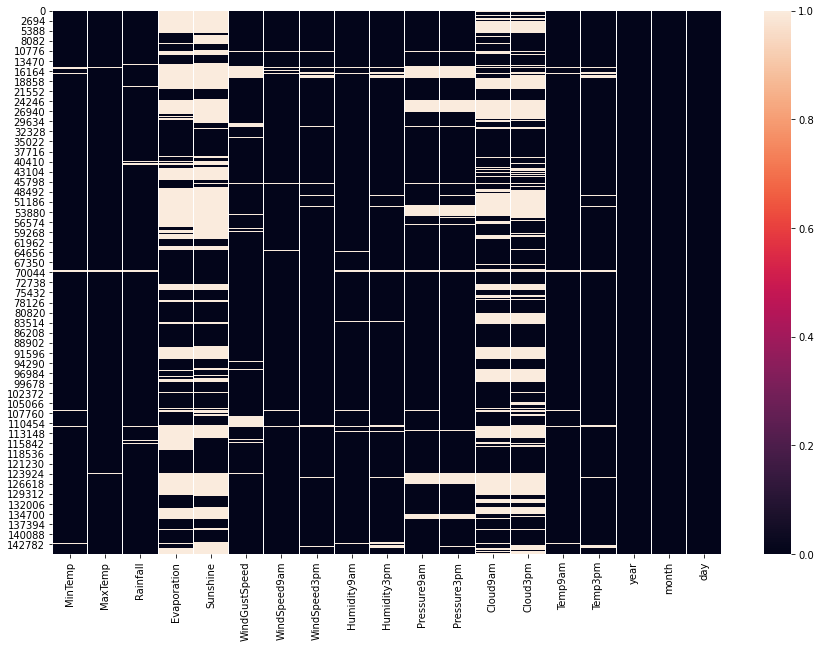

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(rain[numerical_features].isnull(),linecolor='white')

<AxesSubplot:>

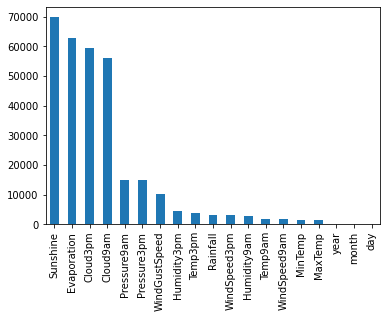

In [24]:
# visualizing the Null values in Numerical Features:

rain[numerical_features].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

<br>

`Null values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the null values with mean values, then outliers in numerical features need to be addressed properly.`

<br>

<span style='font-size:15px;'>&#10145; <b>` Checking for outliers in Numerical Features`</b></span>

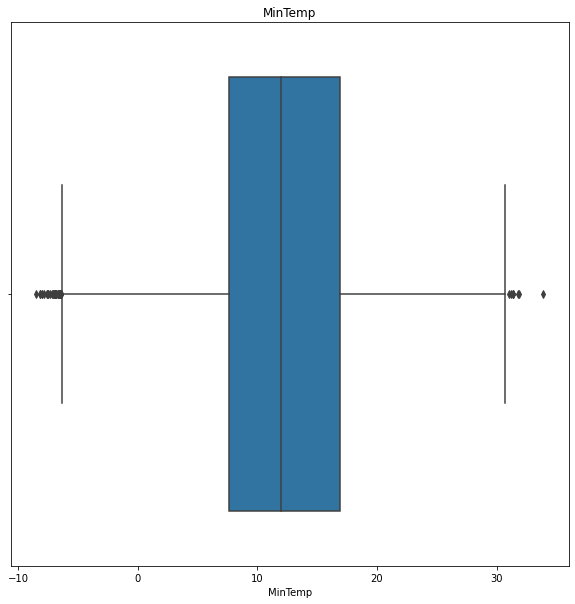

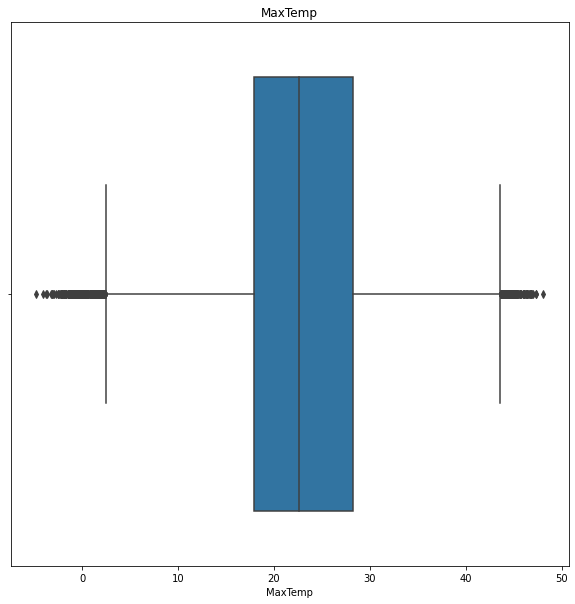

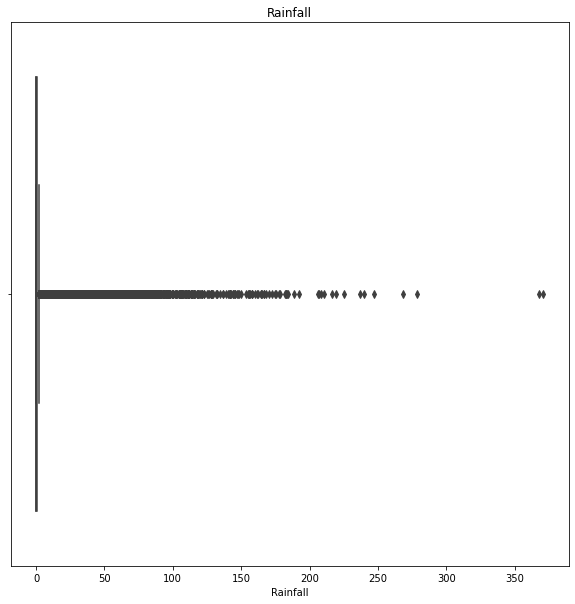

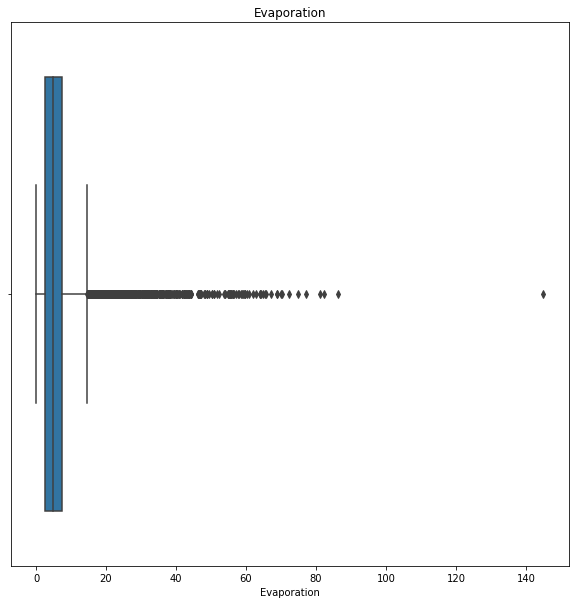

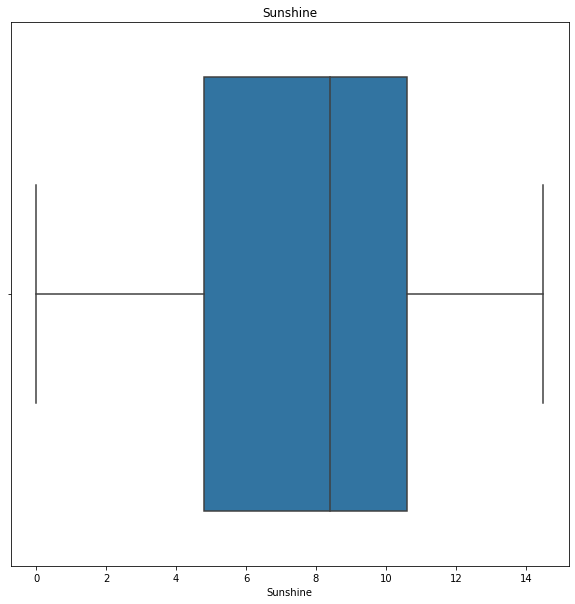

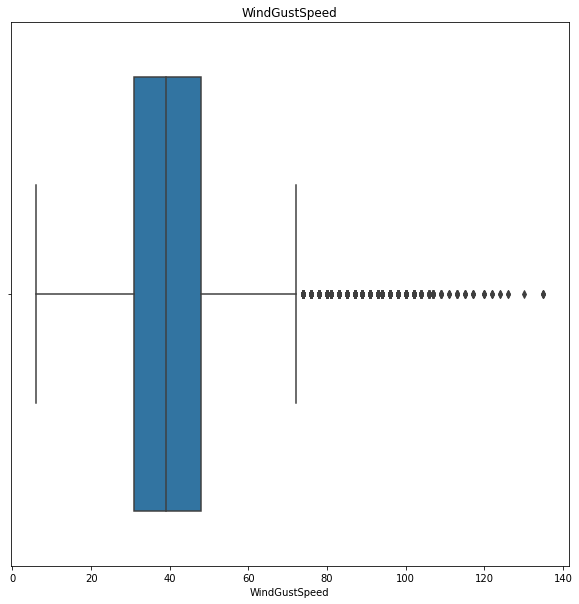

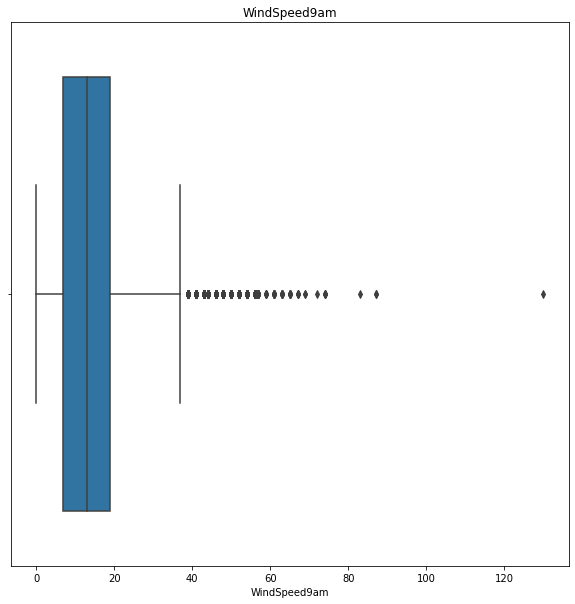

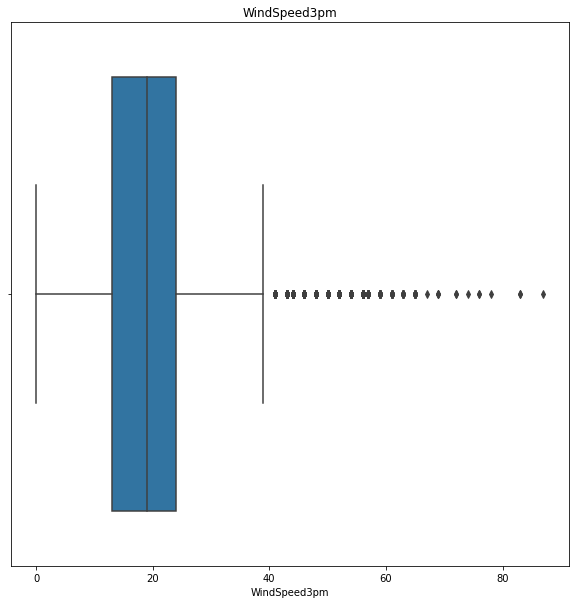

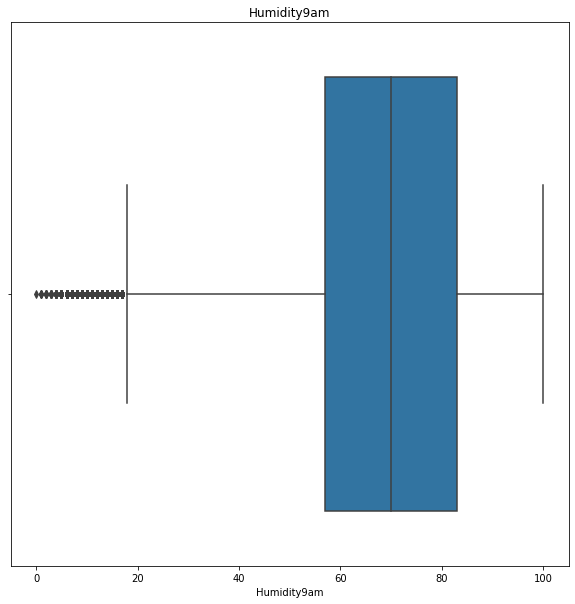

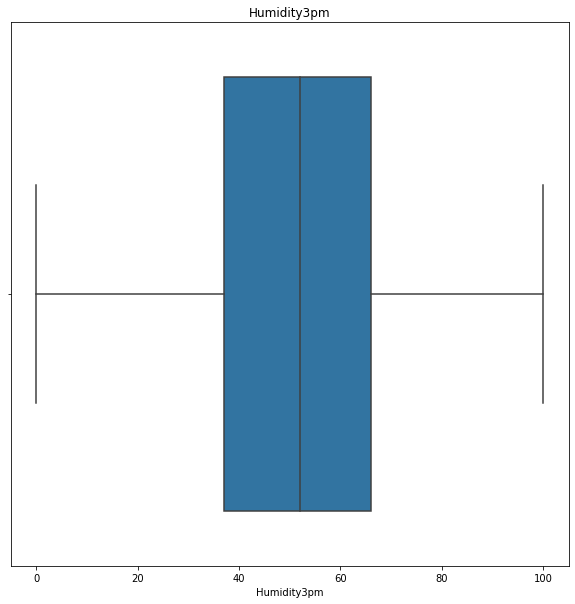

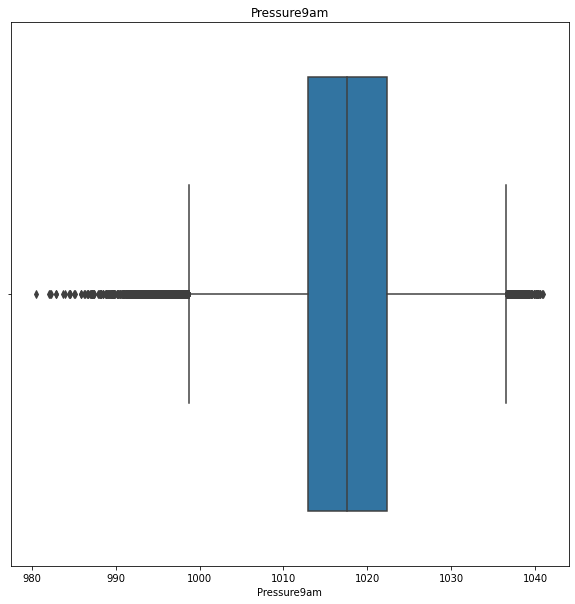

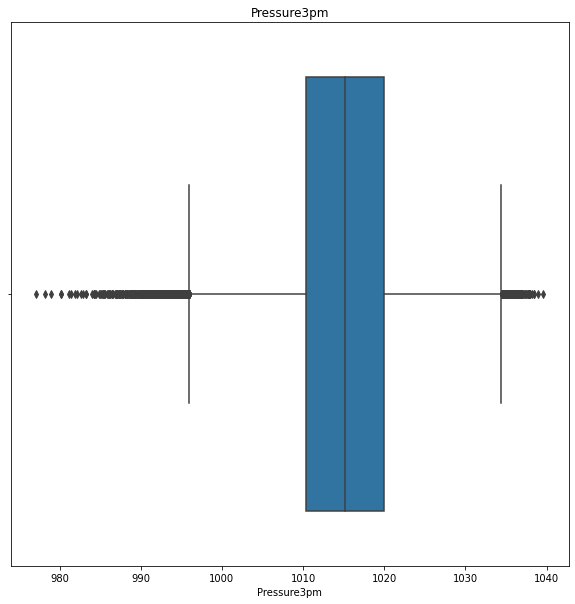

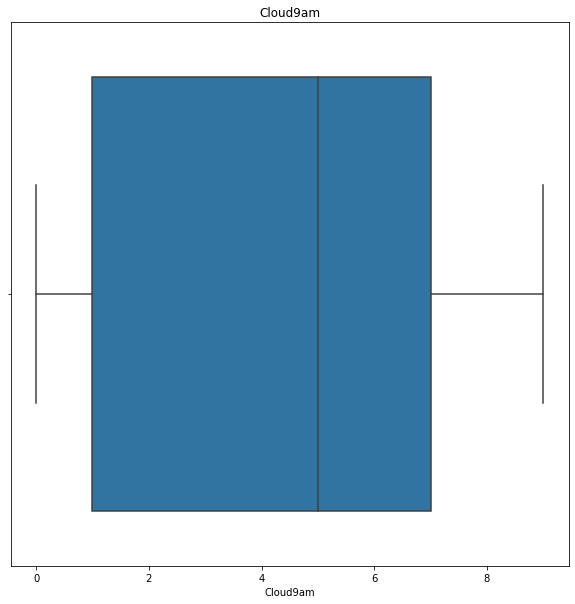

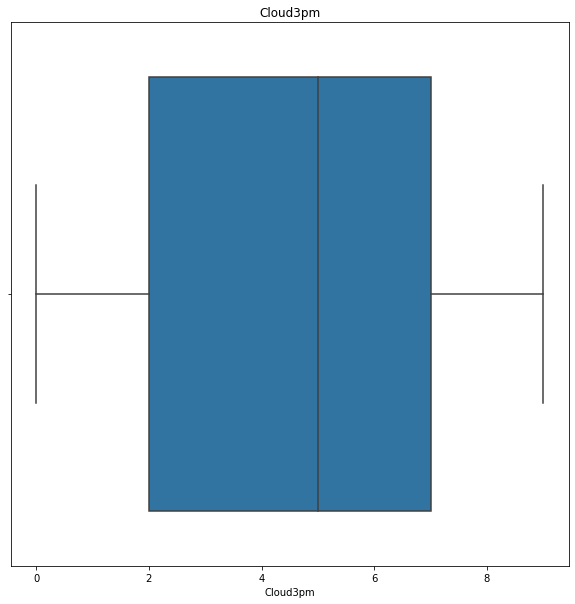

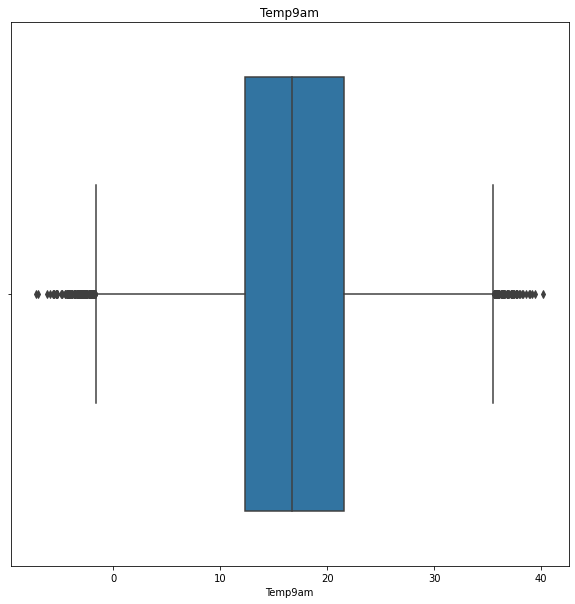

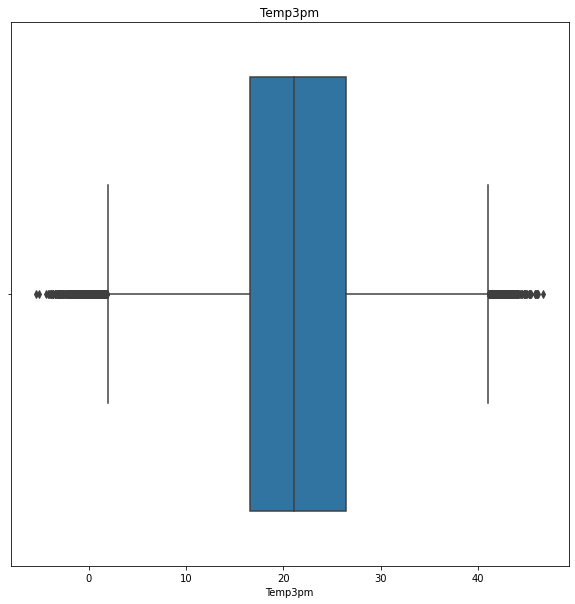

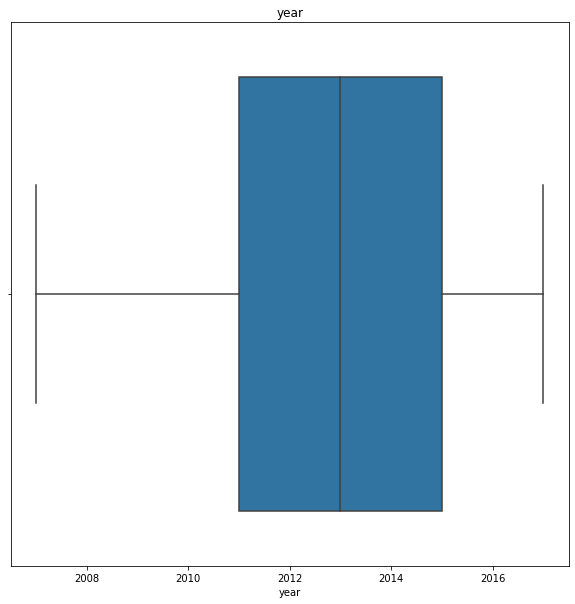

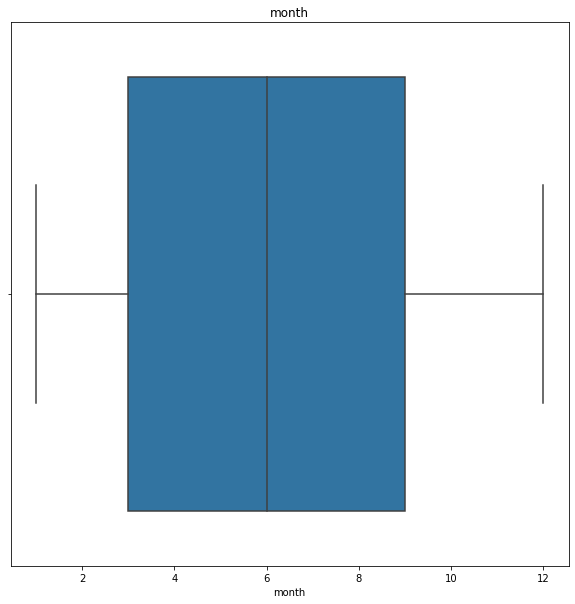

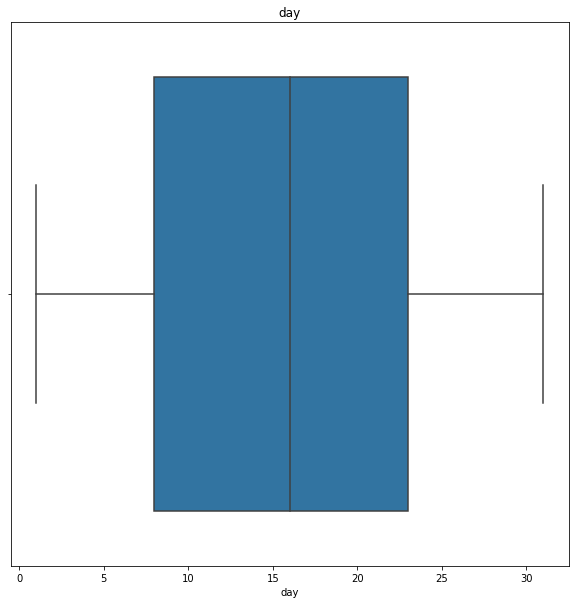

In [25]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)
    

In [26]:
# checking for outliers using the statistical formulas:

rain[numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


<br>

`Outlier Treatment to remove outliers from Numerical Features:`

In [27]:
# features which has outliers:

features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

In [28]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = rain[feature].quantile(0.25)
    q3 = rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] = lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit

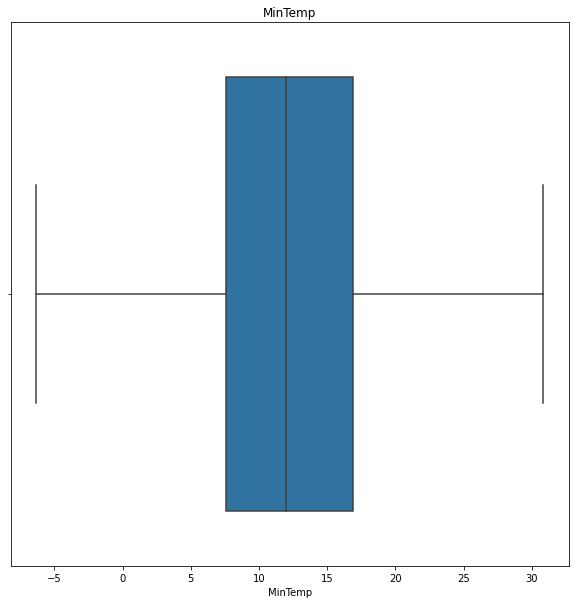

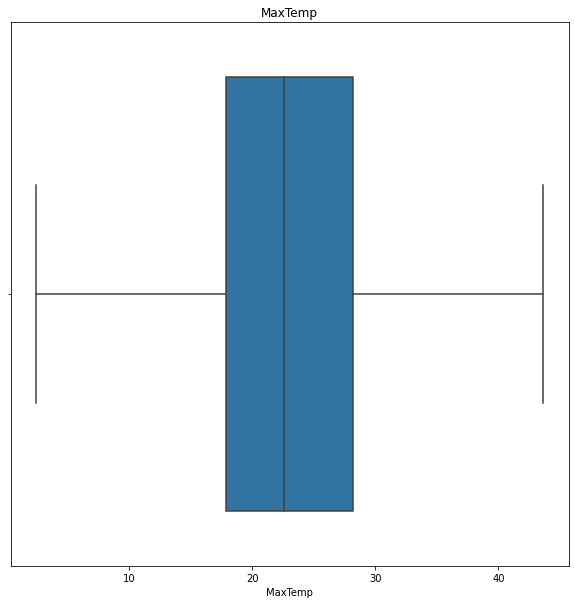

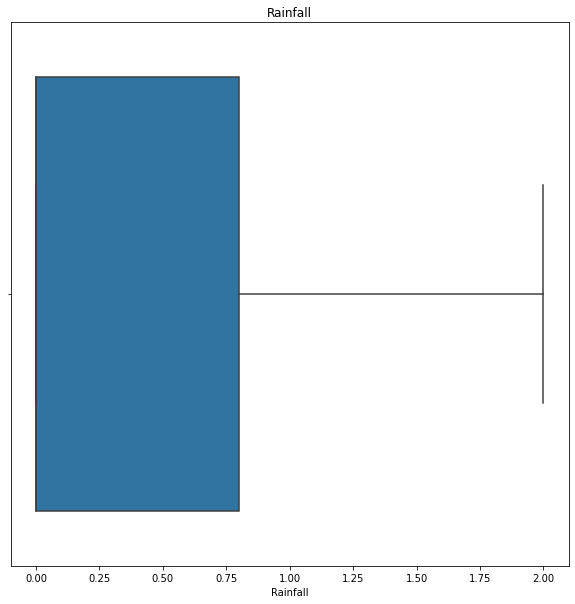

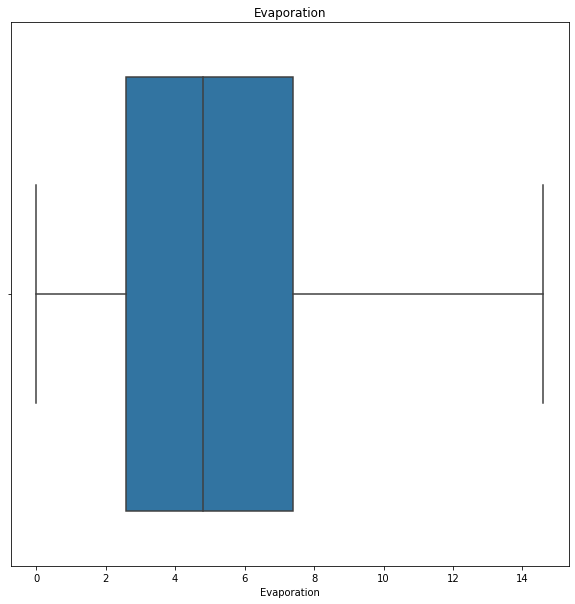

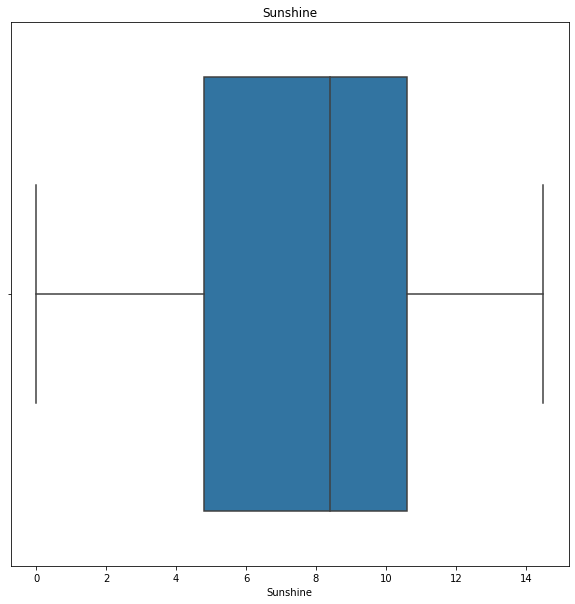

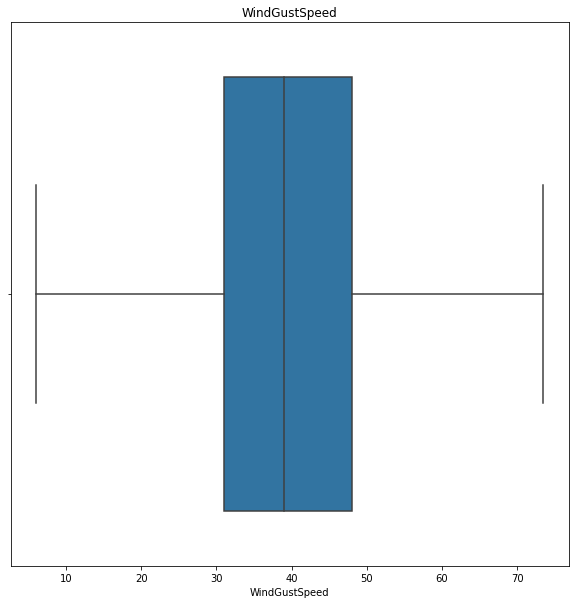

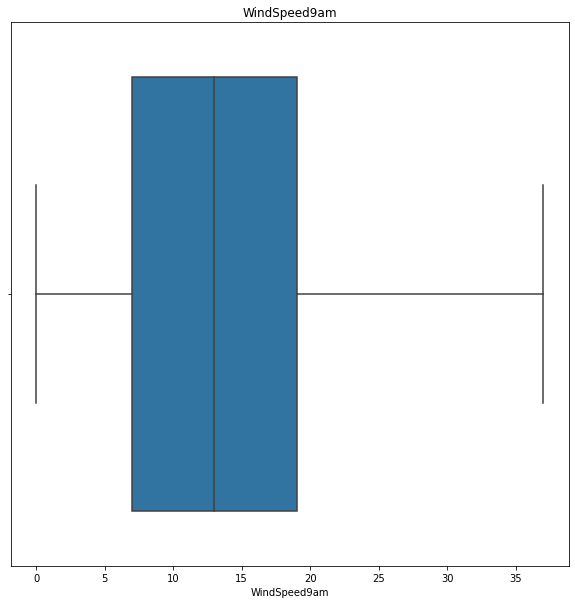

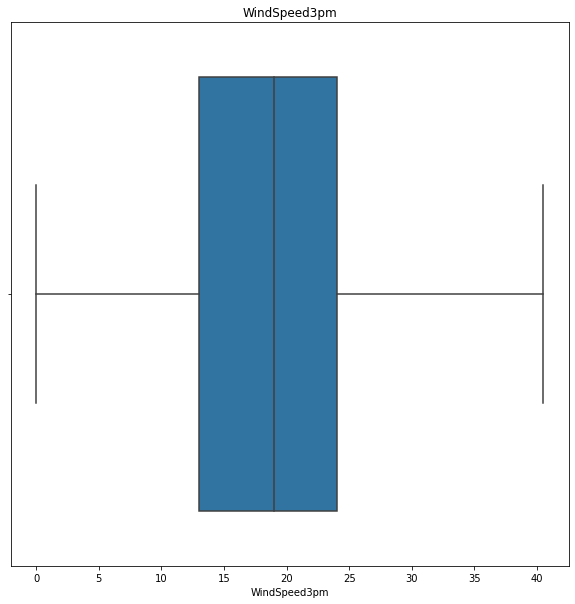

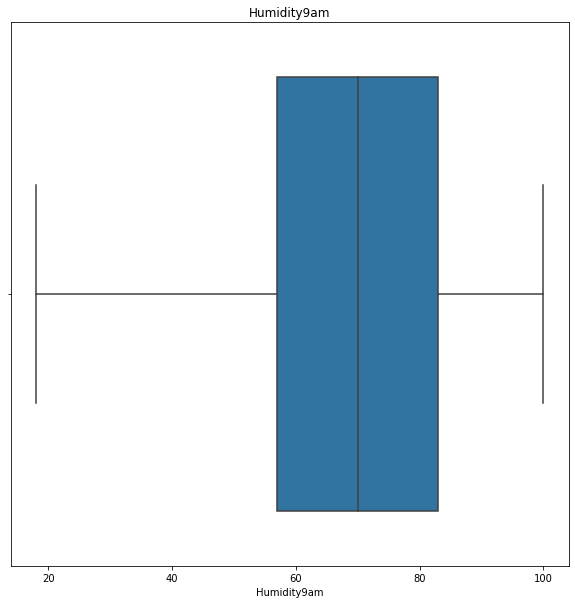

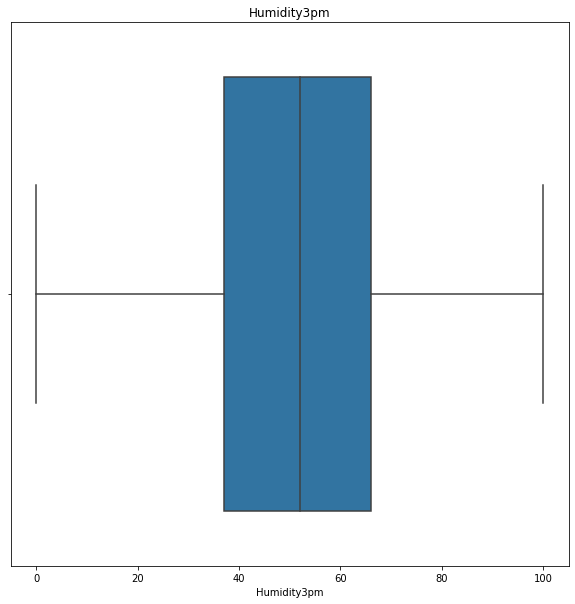

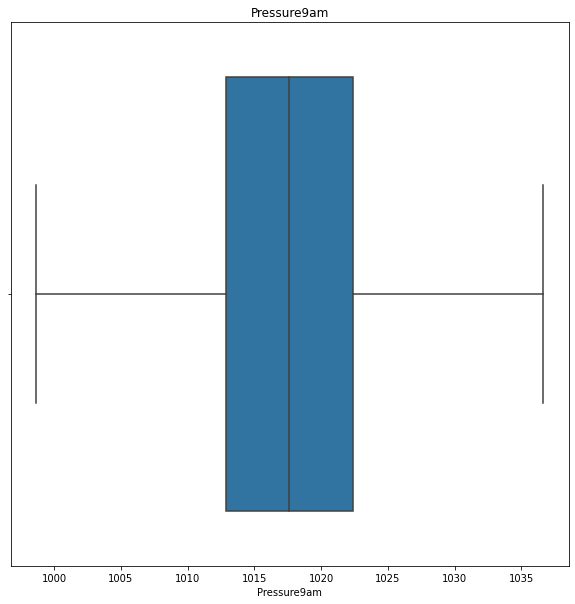

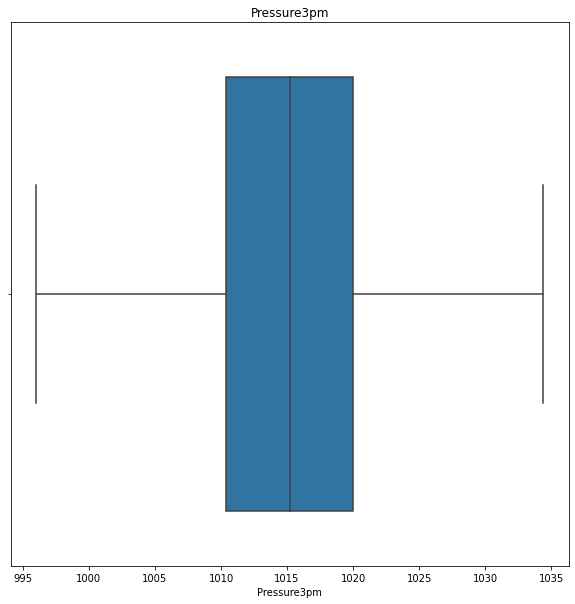

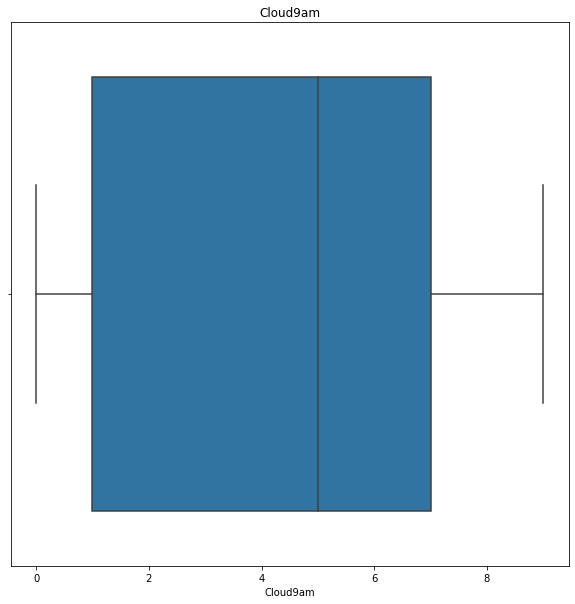

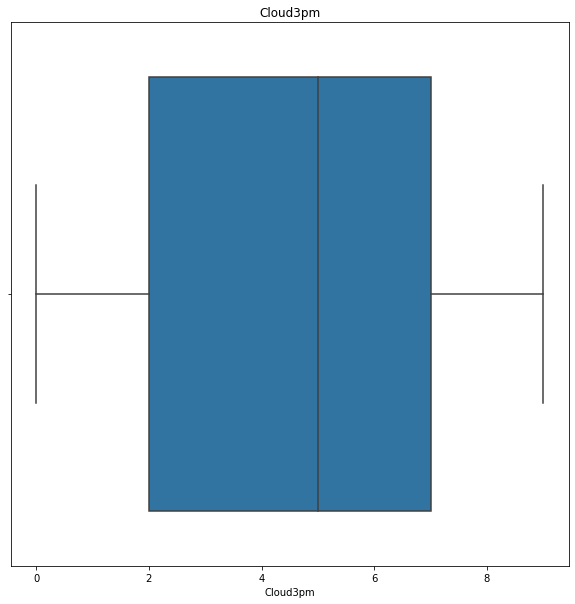

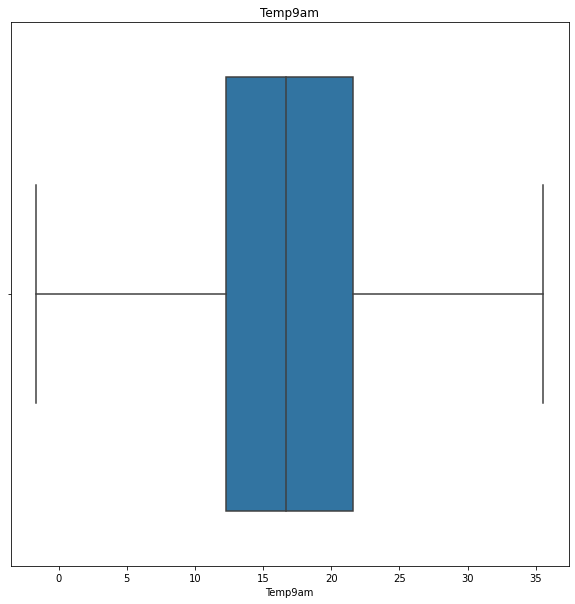

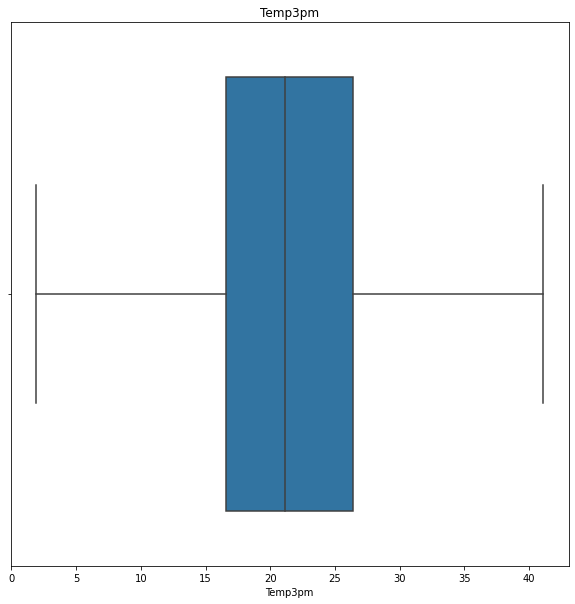

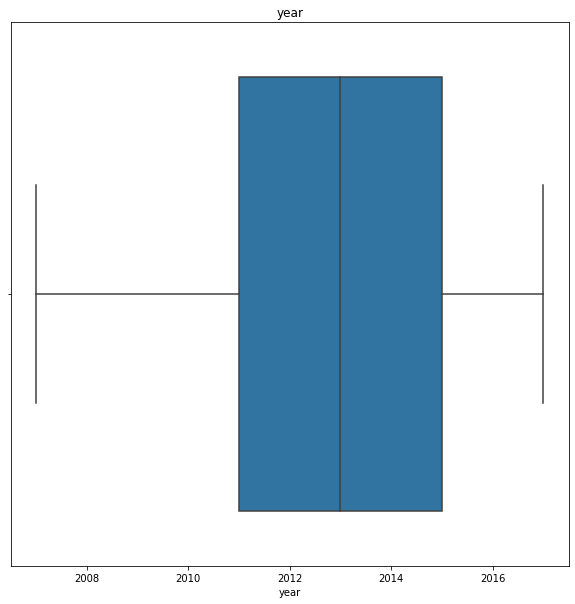

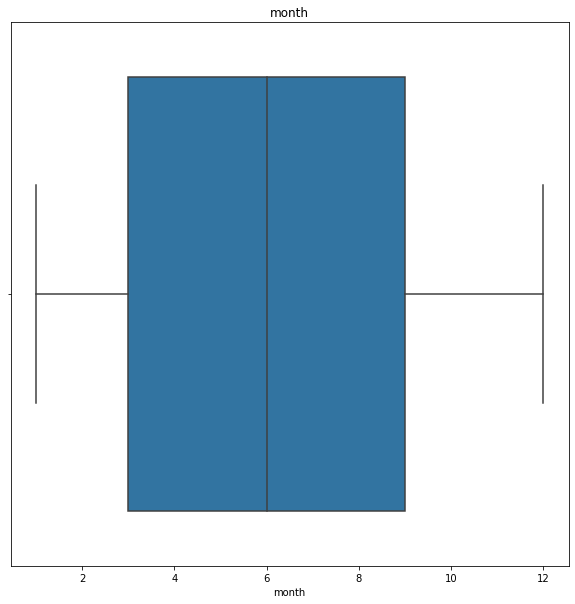

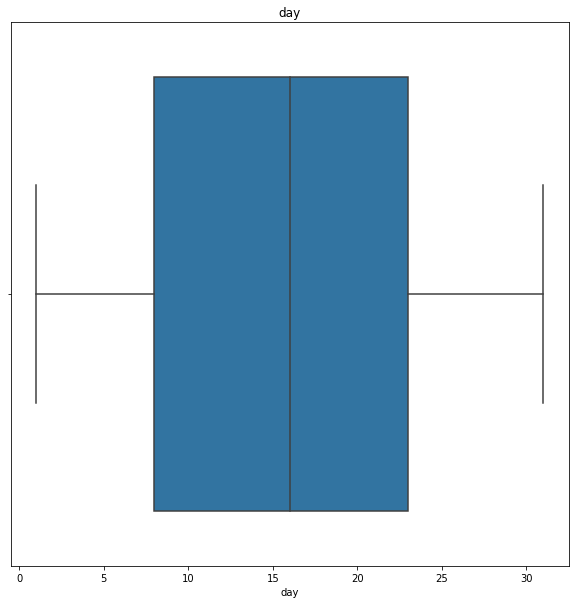

In [29]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(rain[feature])
    plt.title(feature)

<br>

`Imputing null values in numerical features using mean:`

In [30]:
# list of numerical Features with Null values:

numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
numerical_features_with_null

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [31]:
# Filling null values uisng mean: 

for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [32]:
rain.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [33]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>` Univariate Analysis`</b></span>

<AxesSubplot:>

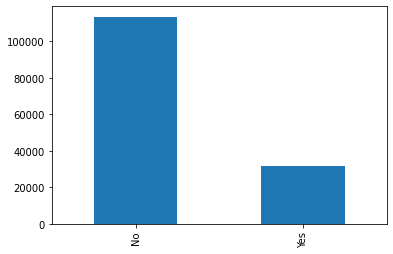

In [34]:
# Exploring RainTomorrow label

rain['RainTomorrow'].value_counts().plot(kind='bar')

Looks like Target variable is imbalanced. It has more 'No' values. If data is imbalanced, then it might decrease performance of model. As this data is released by the meteorological department of Australia, it doesn't make any sense when we try to balance target variable, because the truthfullness of data might descreases. So, let me keep it as it is.

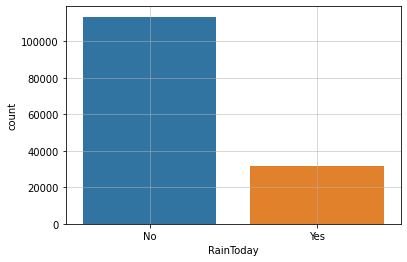

In [35]:
#Exploring RainToday Variable:

sns.countplot(data=rain, x="RainToday")
plt.grid(linewidth = 0.5)
plt.show()

<span style='font-size:15px;'>&#10145; <b>` Multivariate Analysis`</b></span>

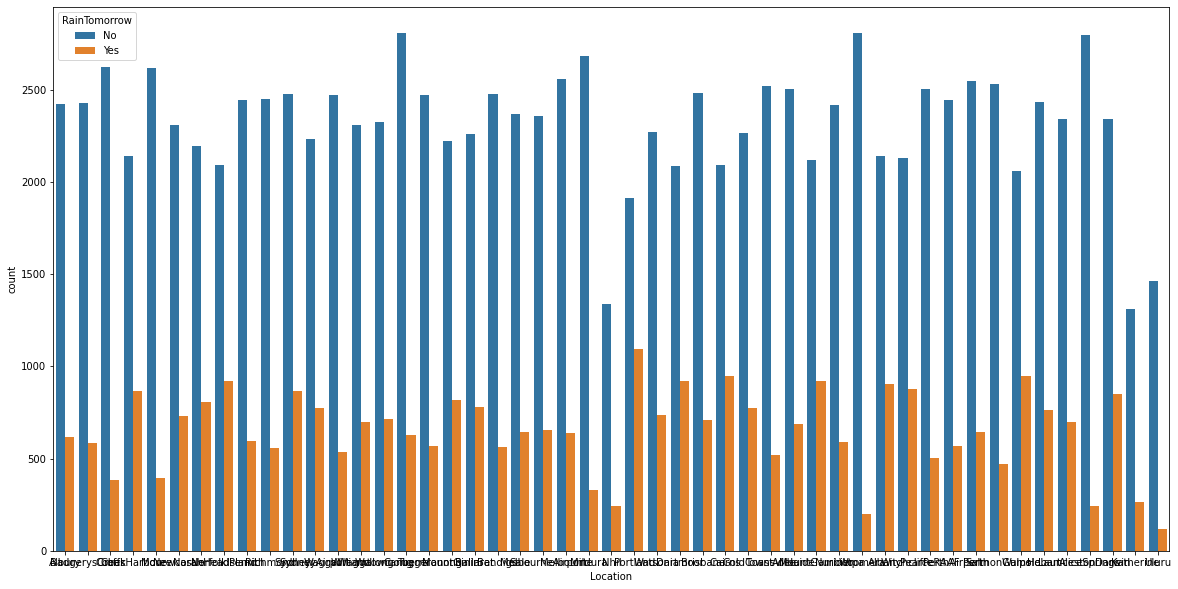

In [36]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=rain)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

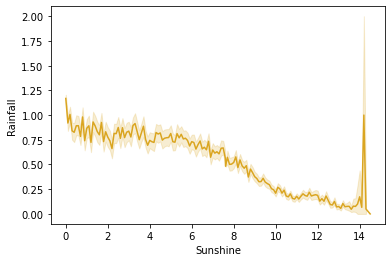

In [37]:
sns.lineplot(data=rain,x='Sunshine',y='Rainfall',color='goldenrod')

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>]], dtype=object)

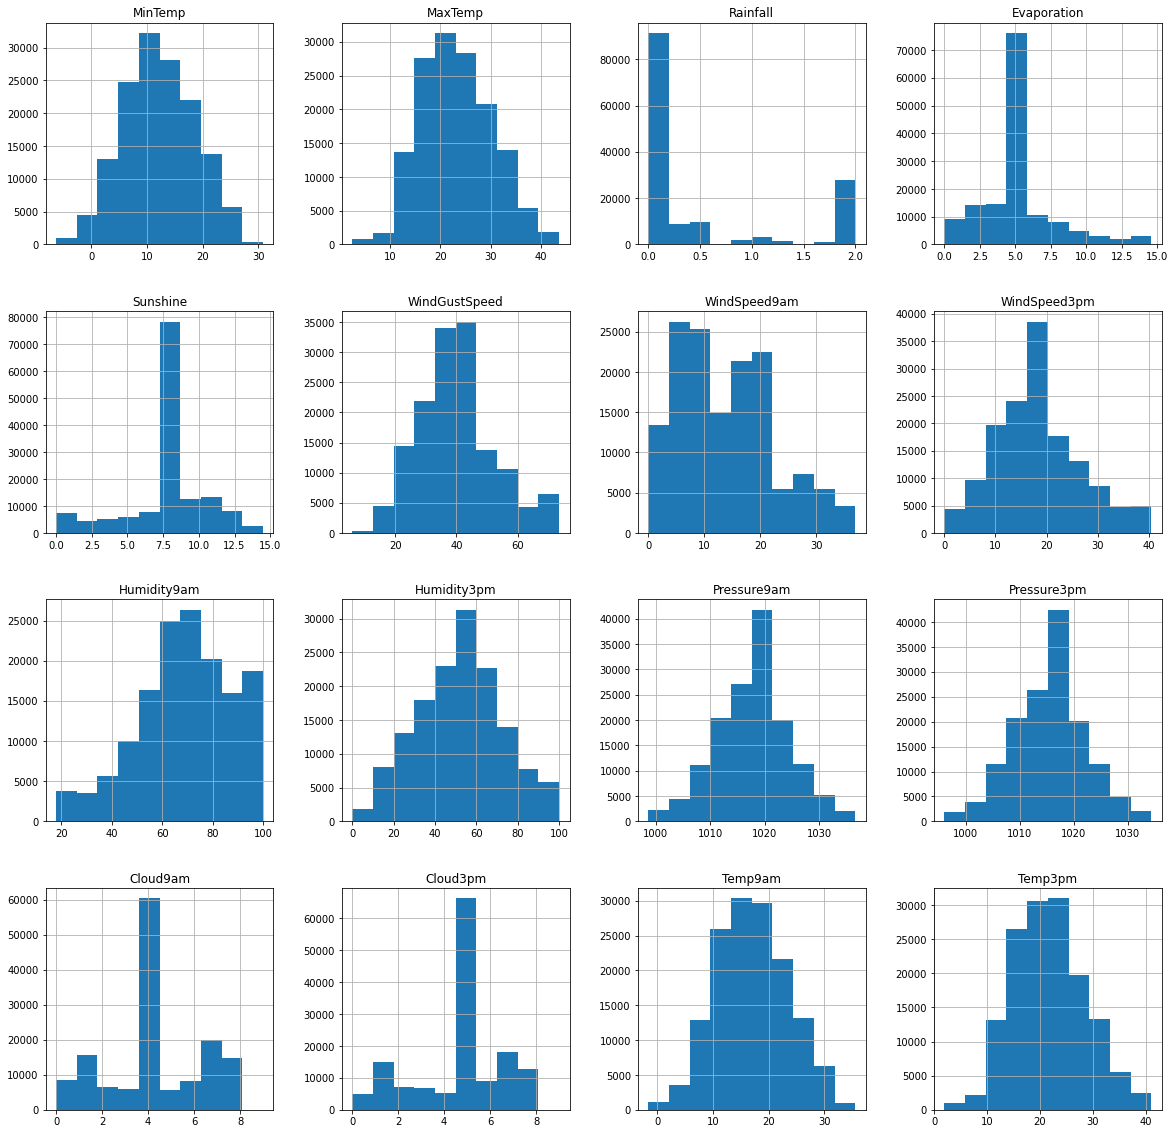

In [38]:
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
rain[num_features].hist(bins=10,figsize=(20,20))

<span style='font-size:15px;'>&#10145; <b>` Correlation:`</b></span>


    - Correlation is a statistic that helps to measure the strength of relationship between features. 

In [39]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
MinTemp,1.000000,0.733392,0.051203,0.404632,0.051295,0.180336,0.177534,0.177176,-0.230718,0.006033,-0.428982,-0.437161,0.062154,0.016724,0.897765,0.699147,0.043007,-0.202744,0.002342
MaxTemp,0.733392,1.000000,-0.255978,0.501465,0.329668,0.073229,0.017140,0.053117,-0.497111,-0.498544,-0.314920,-0.402168,-0.225781,-0.213214,0.879365,0.968905,0.061734,-0.163190,0.000655
Rainfall,0.051203,-0.255978,1.000000,-0.188968,-0.261889,0.151293,0.102499,0.080050,0.387454,0.406205,-0.179751,-0.095155,0.270881,0.234198,-0.114011,-0.260283,-0.014480,0.011964,0.003290
Evaporation,0.404632,0.501465,-0.188968,1.000000,0.339024,0.170903,0.157072,0.113275,-0.421244,-0.318548,-0.248039,-0.269624,-0.168963,-0.167229,0.477917,0.485623,0.060169,-0.024221,-0.005429
Sunshine,0.051295,0.329668,-0.261889,0.339024,1.000000,-0.019597,0.006782,0.041356,-0.349320,-0.443121,0.029821,-0.016637,-0.532497,-0.553853,0.208714,0.347710,0.006072,0.017589,-0.000286
WindGustSpeed,0.180336,0.073229,0.151293,0.170903,-0.019597,1.000000,0.578562,0.659350,-0.214349,-0.028868,-0.424191,-0.381720,0.050920,0.078253,0.154054,0.039421,-0.029014,0.058281,-0.009631
WindSpeed9am,0.177534,0.017140,0.102499,0.157072,0.006782,0.578562,1.000000,0.507874,-0.273399,-0.033036,-0.214427,-0.164884,0.018119,0.039635,0.131738,0.007197,-0.017855,0.051481,-0.008879
WindSpeed3pm,0.177176,0.053117,0.080050,0.113275,0.041356,0.659350,0.507874,1.000000,-0.146602,0.015137,-0.276327,-0.237763,0.041044,0.018156,0.165858,0.031299,-0.029658,0.058906,-0.010331
Humidity9am,-0.230718,-0.497111,0.387454,-0.421244,-0.349320,-0.214349,-0.273399,-0.146602,1.000000,0.658850,0.133181,0.177319,0.354042,0.273774,-0.468540,-0.489627,0.009745,-0.089070,0.015121
Humidity3pm,0.006033,-0.498544,0.406205,-0.318548,-0.443121,-0.028868,-0.033036,0.015137,0.658850,1.000000,-0.024338,0.050405,0.398762,0.406605,-0.216576,-0.555212,-0.009463,-0.018568,0.012813


<AxesSubplot:>

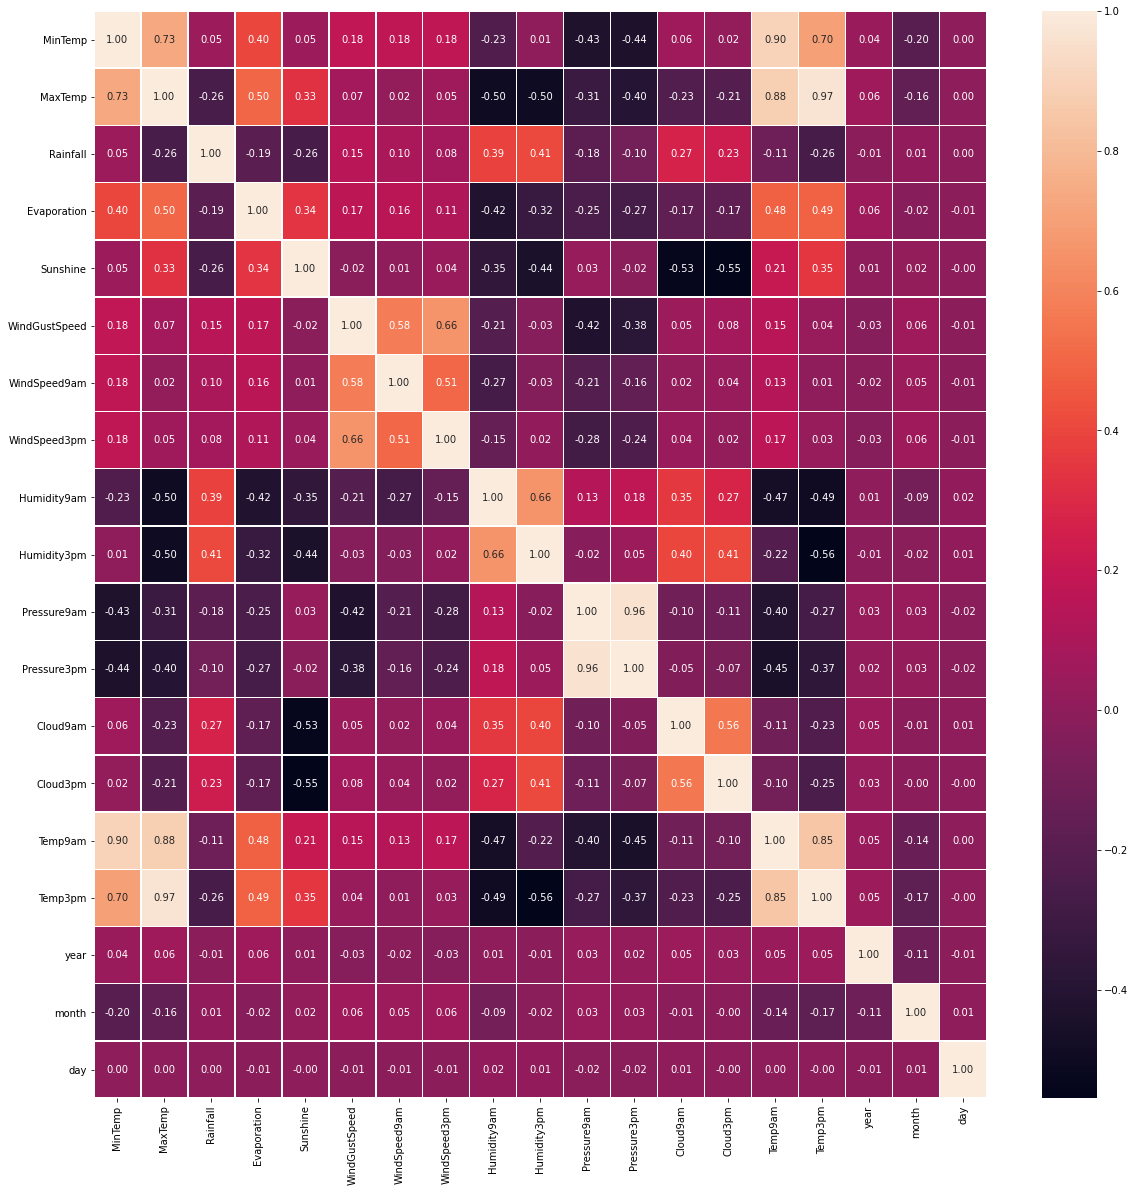

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [41]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,5.318667,7.611178,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.318667,7.611178,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.318667,7.611178,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.318667,7.611178,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.318667,7.611178,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


<br>

<span style='font-size:15px;'>&#10145; <b>`Encoding of Categorical Features`</b></span>

Most Machine Learning Algorithms like Logistic Regression, Support Vector Machines, K Nearest Neighbours etc. can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as `Feature Encoding`.

In [42]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [43]:
# Encoding Categorical Features using replace function:

rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

# pd.get_dummies(rain['RainToday'],drop_first = True)

rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [44]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict


In [45]:
rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [46]:
rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [47]:
rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [48]:
rain['Location'].replace(encode_data('Location'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [49]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [100]:
root_rot = (rain['Rainfall'] > 30) & (rain['MaxTemp'] > 40) & (rain['MinTemp'] < 18)
print(root_rot, "Root Rot found")
stem_rot = (rain['Rainfall'] > 50) & (rain['MaxTemp'] > 35) & (rain['MinTemp'] < 10)
print(stem_rot, "Stem Rot found")

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool Root Rot found
0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Length: 145460, dtype: bool Stem Rot found




`Spliting data into input features and label`

In [101]:
X = rain.drop(['Sunshine'],axis=1)
y = rain['Sunshine']

<span style='font-size:15px;'>&#10145; <b>`Feature Importance:`</b></span>

    - Machine Learning Model performance depends on features that are used to train a model. 
    - Feature importance describes which features are relevant to build a model. 
    - Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are  at predicting a target variable. Feature importance helps in Feature Selection.


In [102]:
# finding feature importance using ExtraTreesRegressor:

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [103]:
etr_model.feature_importances_

array([0.06794028, 0.02335752, 0.03227695, 0.00895538, 0.10275312,
       0.01713868, 0.01484092, 0.01447236, 0.01542016, 0.01511149,
       0.01635027, 0.02014483, 0.04878473, 0.01495262, 0.01477768,
       0.19621864, 0.20282434, 0.01840607, 0.03032588, 0.00503335,
       0.03348953, 0.0311846 , 0.03871262, 0.01652801])

<AxesSubplot:>

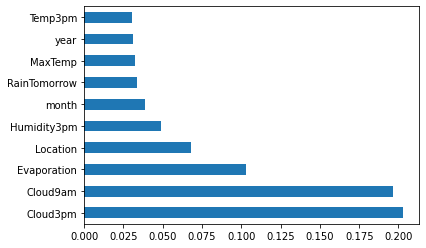

In [104]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [109]:
feature_imp

Location         0.067940
MinTemp          0.023358
MaxTemp          0.032277
Rainfall         0.008955
Evaporation      0.102753
WindGustDir      0.017139
WindGustSpeed    0.014841
WindDir9am       0.014472
WindDir3pm       0.015420
WindSpeed9am     0.015111
WindSpeed3pm     0.016350
Humidity9am      0.020145
Humidity3pm      0.048785
Pressure9am      0.014953
Pressure3pm      0.014778
Cloud9am         0.196219
Cloud3pm         0.202824
Temp9am          0.018406
Temp3pm          0.030326
RainToday        0.005033
RainTomorrow     0.033490
year             0.031185
month            0.038713
day              0.016528
dtype: float64

In [110]:
root_rot_prediction = (feature_imp['Rainfall'] > 30) & (feature_imp['MaxTemp'] > 40) & (feature_imp['MinTemp'] < 18)
print(root_rot_prediction, "Root Rot predicted")
stem_rot_prediction = (feature_imp['Rainfall'] > 50) & (feature_imp['MaxTemp'] > 35) & (feature_imp['MinTemp'] < 10)
print(stem_rot_prediction, "Stem Rot predicted")

False Root Rot predicted
False Stem Rot predicted


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [139]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


## `6) Feature Scaling`  <a class="anchor" id=""></a>

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [141]:
X_test = scaler.transform(X_test)

`Save the Scaler object to Standardize Real Time Data feeded by users for prediction`

In [142]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## `7) Model Building`  <a class="anchor" id=""></a>
    - Model Training
    - Model Testing 
    - Evaluating Model Performance using Accuracy, Confusion Matrix, Classification Report, RUC-AUC curve
    - Finding whether model performance can be improved using Cross Validation Score

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

<span style='font-size:15px;'><b>`(i) Logistic Regression`</b></span>

`Model Training:`

In [144]:
from sklearn.linear_model import LogisticRegression

In [97]:
start_time = time.time()
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)
end_time = time.time()

In [98]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 2.132267951965332


`Model Testing:`

In [99]:
y_pred = classifier_logreg.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [101]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8444933315000688


`Checking for Overfitting and Under Fitting:`

In [102]:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [103]:
# confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:

 [[21536  1190]
 [ 3334  3032]]


In [104]:
# Classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred))

classification_report:

               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [105]:
# predicting probabilities:

y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)

In [106]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])

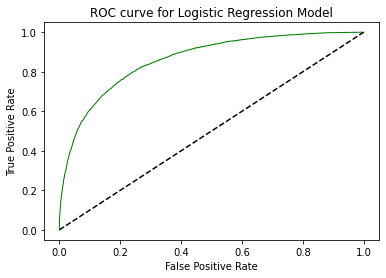

In [107]:
# Plotting ROC curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [108]:
# finding ROC-AUC score:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred)))

ROC AUC Scores: 0.7119586532221237


<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]


In [110]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8433847578355673


_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8445. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(ii) Cat Boost`</b></span>

In [111]:
from catboost import CatBoostClassifier

`Model Training:`

In [112]:
start_time = time.time()
cat_classifier = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat_classifier.fit(X_train, y_train)
end_time = time.time()

Learning rate set to 0.041591
0:	total: 179ms	remaining: 5m 58s
1:	total: 217ms	remaining: 3m 37s
2:	total: 251ms	remaining: 2m 46s
3:	total: 282ms	remaining: 2m 20s
4:	total: 319ms	remaining: 2m 7s
5:	total: 343ms	remaining: 1m 54s
6:	total: 368ms	remaining: 1m 44s
7:	total: 395ms	remaining: 1m 38s
8:	total: 425ms	remaining: 1m 34s
9:	total: 451ms	remaining: 1m 29s
10:	total: 477ms	remaining: 1m 26s
11:	total: 502ms	remaining: 1m 23s
12:	total: 528ms	remaining: 1m 20s
13:	total: 553ms	remaining: 1m 18s
14:	total: 579ms	remaining: 1m 16s
15:	total: 607ms	remaining: 1m 15s
16:	total: 633ms	remaining: 1m 13s
17:	total: 659ms	remaining: 1m 12s
18:	total: 684ms	remaining: 1m 11s
19:	total: 710ms	remaining: 1m 10s
20:	total: 735ms	remaining: 1m 9s
21:	total: 761ms	remaining: 1m 8s
22:	total: 787ms	remaining: 1m 7s
23:	total: 812ms	remaining: 1m 6s
24:	total: 840ms	remaining: 1m 6s
25:	total: 866ms	remaining: 1m 5s
26:	total: 892ms	remaining: 1m 5s
27:	total: 918ms	remaining: 1m 4s
28:	total

239:	total: 6.49s	remaining: 47.6s
240:	total: 6.52s	remaining: 47.6s
241:	total: 6.54s	remaining: 47.5s
242:	total: 6.57s	remaining: 47.5s
243:	total: 6.6s	remaining: 47.5s
244:	total: 6.62s	remaining: 47.4s
245:	total: 6.65s	remaining: 47.4s
246:	total: 6.68s	remaining: 47.4s
247:	total: 6.71s	remaining: 47.4s
248:	total: 6.73s	remaining: 47.3s
249:	total: 6.76s	remaining: 47.3s
250:	total: 6.78s	remaining: 47.2s
251:	total: 6.8s	remaining: 47.2s
252:	total: 6.83s	remaining: 47.2s
253:	total: 6.85s	remaining: 47.1s
254:	total: 6.88s	remaining: 47.1s
255:	total: 6.9s	remaining: 47s
256:	total: 6.93s	remaining: 47s
257:	total: 6.96s	remaining: 47s
258:	total: 6.98s	remaining: 46.9s
259:	total: 7.01s	remaining: 46.9s
260:	total: 7.04s	remaining: 46.9s
261:	total: 7.06s	remaining: 46.8s
262:	total: 7.09s	remaining: 46.8s
263:	total: 7.11s	remaining: 46.8s
264:	total: 7.14s	remaining: 46.8s
265:	total: 7.17s	remaining: 46.7s
266:	total: 7.19s	remaining: 46.7s
267:	total: 7.22s	remaining: 

477:	total: 12.8s	remaining: 40.7s
478:	total: 12.8s	remaining: 40.7s
479:	total: 12.8s	remaining: 40.6s
480:	total: 12.9s	remaining: 40.6s
481:	total: 12.9s	remaining: 40.6s
482:	total: 12.9s	remaining: 40.5s
483:	total: 12.9s	remaining: 40.5s
484:	total: 13s	remaining: 40.5s
485:	total: 13s	remaining: 40.5s
486:	total: 13s	remaining: 40.4s
487:	total: 13s	remaining: 40.4s
488:	total: 13.1s	remaining: 40.4s
489:	total: 13.1s	remaining: 40.4s
490:	total: 13.1s	remaining: 40.3s
491:	total: 13.2s	remaining: 40.3s
492:	total: 13.2s	remaining: 40.3s
493:	total: 13.2s	remaining: 40.3s
494:	total: 13.2s	remaining: 40.2s
495:	total: 13.3s	remaining: 40.2s
496:	total: 13.3s	remaining: 40.2s
497:	total: 13.3s	remaining: 40.2s
498:	total: 13.3s	remaining: 40.1s
499:	total: 13.4s	remaining: 40.1s
500:	total: 13.4s	remaining: 40.1s
501:	total: 13.4s	remaining: 40s
502:	total: 13.4s	remaining: 40s
503:	total: 13.5s	remaining: 40s
504:	total: 13.5s	remaining: 40s
505:	total: 13.5s	remaining: 39.9s
5

715:	total: 18.9s	remaining: 33.9s
716:	total: 18.9s	remaining: 33.9s
717:	total: 19s	remaining: 33.9s
718:	total: 19s	remaining: 33.8s
719:	total: 19s	remaining: 33.8s
720:	total: 19s	remaining: 33.8s
721:	total: 19.1s	remaining: 33.7s
722:	total: 19.1s	remaining: 33.7s
723:	total: 19.1s	remaining: 33.7s
724:	total: 19.1s	remaining: 33.7s
725:	total: 19.2s	remaining: 33.6s
726:	total: 19.2s	remaining: 33.6s
727:	total: 19.2s	remaining: 33.6s
728:	total: 19.2s	remaining: 33.5s
729:	total: 19.3s	remaining: 33.5s
730:	total: 19.3s	remaining: 33.5s
731:	total: 19.3s	remaining: 33.5s
732:	total: 19.3s	remaining: 33.4s
733:	total: 19.4s	remaining: 33.4s
734:	total: 19.4s	remaining: 33.4s
735:	total: 19.4s	remaining: 33.3s
736:	total: 19.4s	remaining: 33.3s
737:	total: 19.5s	remaining: 33.3s
738:	total: 19.5s	remaining: 33.2s
739:	total: 19.5s	remaining: 33.2s
740:	total: 19.5s	remaining: 33.2s
741:	total: 19.6s	remaining: 33.2s
742:	total: 19.6s	remaining: 33.1s
743:	total: 19.6s	remaining:

956:	total: 25.2s	remaining: 27.4s
957:	total: 25.2s	remaining: 27.4s
958:	total: 25.2s	remaining: 27.4s
959:	total: 25.2s	remaining: 27.3s
960:	total: 25.3s	remaining: 27.3s
961:	total: 25.3s	remaining: 27.3s
962:	total: 25.3s	remaining: 27.3s
963:	total: 25.3s	remaining: 27.2s
964:	total: 25.4s	remaining: 27.2s
965:	total: 25.4s	remaining: 27.2s
966:	total: 25.4s	remaining: 27.2s
967:	total: 25.4s	remaining: 27.1s
968:	total: 25.5s	remaining: 27.1s
969:	total: 25.5s	remaining: 27.1s
970:	total: 25.5s	remaining: 27s
971:	total: 25.5s	remaining: 27s
972:	total: 25.6s	remaining: 27s
973:	total: 25.6s	remaining: 27s
974:	total: 25.6s	remaining: 26.9s
975:	total: 25.7s	remaining: 26.9s
976:	total: 25.7s	remaining: 26.9s
977:	total: 25.7s	remaining: 26.9s
978:	total: 25.7s	remaining: 26.9s
979:	total: 25.8s	remaining: 26.8s
980:	total: 25.8s	remaining: 26.8s
981:	total: 25.8s	remaining: 26.8s
982:	total: 25.9s	remaining: 26.8s
983:	total: 25.9s	remaining: 26.7s
984:	total: 25.9s	remaining:

1190:	total: 31.3s	remaining: 21.3s
1191:	total: 31.4s	remaining: 21.3s
1192:	total: 31.4s	remaining: 21.2s
1193:	total: 31.4s	remaining: 21.2s
1194:	total: 31.4s	remaining: 21.2s
1195:	total: 31.5s	remaining: 21.2s
1196:	total: 31.5s	remaining: 21.1s
1197:	total: 31.5s	remaining: 21.1s
1198:	total: 31.6s	remaining: 21.1s
1199:	total: 31.6s	remaining: 21.1s
1200:	total: 31.6s	remaining: 21s
1201:	total: 31.6s	remaining: 21s
1202:	total: 31.7s	remaining: 21s
1203:	total: 31.7s	remaining: 21s
1204:	total: 31.7s	remaining: 20.9s
1205:	total: 31.8s	remaining: 20.9s
1206:	total: 31.8s	remaining: 20.9s
1207:	total: 31.8s	remaining: 20.9s
1208:	total: 31.8s	remaining: 20.8s
1209:	total: 31.9s	remaining: 20.8s
1210:	total: 31.9s	remaining: 20.8s
1211:	total: 31.9s	remaining: 20.8s
1212:	total: 32s	remaining: 20.7s
1213:	total: 32s	remaining: 20.7s
1214:	total: 32s	remaining: 20.7s
1215:	total: 32.1s	remaining: 20.7s
1216:	total: 32.1s	remaining: 20.6s
1217:	total: 32.1s	remaining: 20.6s
1218:	

1420:	total: 37.3s	remaining: 15.2s
1421:	total: 37.4s	remaining: 15.2s
1422:	total: 37.4s	remaining: 15.2s
1423:	total: 37.4s	remaining: 15.1s
1424:	total: 37.4s	remaining: 15.1s
1425:	total: 37.5s	remaining: 15.1s
1426:	total: 37.5s	remaining: 15.1s
1427:	total: 37.5s	remaining: 15s
1428:	total: 37.5s	remaining: 15s
1429:	total: 37.6s	remaining: 15s
1430:	total: 37.6s	remaining: 14.9s
1431:	total: 37.6s	remaining: 14.9s
1432:	total: 37.7s	remaining: 14.9s
1433:	total: 37.7s	remaining: 14.9s
1434:	total: 37.7s	remaining: 14.8s
1435:	total: 37.7s	remaining: 14.8s
1436:	total: 37.8s	remaining: 14.8s
1437:	total: 37.8s	remaining: 14.8s
1438:	total: 37.8s	remaining: 14.7s
1439:	total: 37.8s	remaining: 14.7s
1440:	total: 37.9s	remaining: 14.7s
1441:	total: 37.9s	remaining: 14.7s
1442:	total: 37.9s	remaining: 14.6s
1443:	total: 37.9s	remaining: 14.6s
1444:	total: 38s	remaining: 14.6s
1445:	total: 38s	remaining: 14.6s
1446:	total: 38s	remaining: 14.5s
1447:	total: 38s	remaining: 14.5s
1448:	

1655:	total: 43.4s	remaining: 9.02s
1656:	total: 43.5s	remaining: 8.99s
1657:	total: 43.5s	remaining: 8.97s
1658:	total: 43.5s	remaining: 8.94s
1659:	total: 43.5s	remaining: 8.91s
1660:	total: 43.6s	remaining: 8.89s
1661:	total: 43.6s	remaining: 8.86s
1662:	total: 43.6s	remaining: 8.84s
1663:	total: 43.6s	remaining: 8.81s
1664:	total: 43.7s	remaining: 8.78s
1665:	total: 43.7s	remaining: 8.76s
1666:	total: 43.7s	remaining: 8.73s
1667:	total: 43.7s	remaining: 8.7s
1668:	total: 43.8s	remaining: 8.68s
1669:	total: 43.8s	remaining: 8.65s
1670:	total: 43.8s	remaining: 8.63s
1671:	total: 43.8s	remaining: 8.6s
1672:	total: 43.9s	remaining: 8.57s
1673:	total: 43.9s	remaining: 8.55s
1674:	total: 43.9s	remaining: 8.52s
1675:	total: 43.9s	remaining: 8.49s
1676:	total: 44s	remaining: 8.47s
1677:	total: 44s	remaining: 8.44s
1678:	total: 44s	remaining: 8.41s
1679:	total: 44s	remaining: 8.39s
1680:	total: 44.1s	remaining: 8.36s
1681:	total: 44.1s	remaining: 8.34s
1682:	total: 44.1s	remaining: 8.31s
16

1888:	total: 50s	remaining: 2.94s
1889:	total: 50s	remaining: 2.91s
1890:	total: 50.1s	remaining: 2.88s
1891:	total: 50.1s	remaining: 2.86s
1892:	total: 50.1s	remaining: 2.83s
1893:	total: 50.1s	remaining: 2.81s
1894:	total: 50.2s	remaining: 2.78s
1895:	total: 50.2s	remaining: 2.75s
1896:	total: 50.2s	remaining: 2.73s
1897:	total: 50.3s	remaining: 2.7s
1898:	total: 50.3s	remaining: 2.67s
1899:	total: 50.3s	remaining: 2.65s
1900:	total: 50.4s	remaining: 2.62s
1901:	total: 50.4s	remaining: 2.6s
1902:	total: 50.4s	remaining: 2.57s
1903:	total: 50.5s	remaining: 2.54s
1904:	total: 50.5s	remaining: 2.52s
1905:	total: 50.5s	remaining: 2.49s
1906:	total: 50.6s	remaining: 2.47s
1907:	total: 50.6s	remaining: 2.44s
1908:	total: 50.6s	remaining: 2.41s
1909:	total: 50.7s	remaining: 2.39s
1910:	total: 50.7s	remaining: 2.36s
1911:	total: 50.7s	remaining: 2.33s
1912:	total: 50.8s	remaining: 2.31s
1913:	total: 50.8s	remaining: 2.28s
1914:	total: 50.8s	remaining: 2.25s
1915:	total: 50.8s	remaining: 2.23

In [113]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 54.16138553619385


`Model Testing:`

In [114]:
y_pred_cat = cat_classifier.predict(X_test)

In [115]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_cat)))

Accuracy Score: 0.8644300838718548


`Checking for Overfitting and Under Fitting:`

In [116]:
print("Train Data Score: {}".format(cat_classifier.score(X_train, y_train)))
print("Test Data Score: {}".format(cat_classifier.score(X_test, y_test)))

Train Data Score: 0.891963426371511
Test Data Score: 0.8644300838718548


_`Accuracy Score of Training and Testing Data is comparable and almost equal. So, there is no question of Underfitting and Over Fitting. And model is generalizing well for new unseen data.`_

In [117]:
# Confusion Matrix:

print("Confusion Matrix:")
print("\n",confusion_matrix(y_test,y_pred_cat))

Confusion Matrix:

 [[21633  1093]
 [ 2851  3515]]


In [118]:
# classification Report:

print("classification_report:")
print("\n",classification_report(y_test,y_pred_cat))

classification_report:

               precision    recall  f1-score   support

           0       0.88      0.95      0.92     22726
           1       0.76      0.55      0.64      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [119]:
# predicting the probabilities:

y_pred_cat_proba = cat_classifier.predict_proba(X_test)

In [120]:
# Finding True Positive Rate(tpr), False Positive Rate(fpr), threshold values to plot ROC curve  

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cat_proba[:,1])

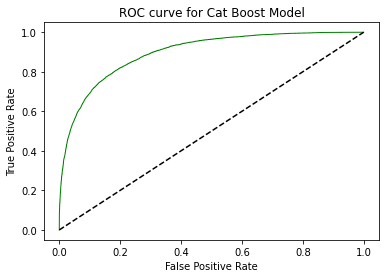

In [121]:
# plotting ROC Curve:

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Cat Boost Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
#finding ROC AUC Scores:

from sklearn.metrics import roc_auc_score
print('ROC AUC Scores: {}'.format(roc_auc_score(y_test, y_pred_cat)))

ROC AUC Scores: 0.7520286822521376


<br>

`Finding whether model performance can be improved using Cross Validation Score:`

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cat_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Learning rate set to 0.037811
0:	total: 25.1ms	remaining: 50.1s
1:	total: 48.2ms	remaining: 48.2s
2:	total: 73.6ms	remaining: 49s
3:	total: 98.9ms	remaining: 49.4s
4:	total: 122ms	remaining: 48.8s
5:	total: 145ms	remaining: 48.2s
6:	total: 169ms	remaining: 48.1s
7:	total: 193ms	remaining: 48.1s
8:	total: 215ms	remaining: 47.5s
9:	total: 240ms	remaining: 47.8s
10:	total: 261ms	remaining: 47.2s
11:	total: 283ms	remaining: 46.8s
12:	total: 308ms	remaining: 47.1s
13:	total: 332ms	remaining: 47.1s
14:	total: 354ms	remaining: 46.8s
15:	total: 375ms	remaining: 46.5s
16:	total: 400ms	remaining: 46.7s
17:	total: 424ms	remaining: 46.7s
18:	total: 447ms	remaining: 46.6s
19:	total: 471ms	remaining: 46.6s
20:	total: 493ms	remaining: 46.5s
21:	total: 515ms	remaining: 46.3s
22:	total: 540ms	remaining: 46.4s
23:	total: 561ms	remaining: 46.2s
24:	total: 584ms	remaining: 46.1s
25:	total: 607ms	remaining: 46.1s
26:	total: 632ms	remaining: 46.2s
27:	total: 654ms	remaining: 46.1s
28:	total: 675ms	remaining

244:	total: 5.67s	remaining: 40.7s
245:	total: 5.7s	remaining: 40.6s
246:	total: 5.72s	remaining: 40.6s
247:	total: 5.74s	remaining: 40.6s
248:	total: 5.77s	remaining: 40.6s
249:	total: 5.79s	remaining: 40.6s
250:	total: 5.82s	remaining: 40.5s
251:	total: 5.84s	remaining: 40.5s
252:	total: 5.86s	remaining: 40.5s
253:	total: 5.88s	remaining: 40.4s
254:	total: 5.91s	remaining: 40.4s
255:	total: 5.93s	remaining: 40.4s
256:	total: 5.95s	remaining: 40.4s
257:	total: 5.97s	remaining: 40.3s
258:	total: 5.99s	remaining: 40.3s
259:	total: 6.02s	remaining: 40.3s
260:	total: 6.04s	remaining: 40.3s
261:	total: 6.07s	remaining: 40.2s
262:	total: 6.09s	remaining: 40.2s
263:	total: 6.12s	remaining: 40.2s
264:	total: 6.14s	remaining: 40.2s
265:	total: 6.17s	remaining: 40.2s
266:	total: 6.19s	remaining: 40.2s
267:	total: 6.22s	remaining: 40.2s
268:	total: 6.24s	remaining: 40.1s
269:	total: 6.26s	remaining: 40.1s
270:	total: 6.28s	remaining: 40.1s
271:	total: 6.31s	remaining: 40.1s
272:	total: 6.33s	rem

481:	total: 11.1s	remaining: 35.1s
482:	total: 11.2s	remaining: 35.1s
483:	total: 11.2s	remaining: 35.1s
484:	total: 11.2s	remaining: 35s
485:	total: 11.2s	remaining: 35s
486:	total: 11.3s	remaining: 35s
487:	total: 11.3s	remaining: 35s
488:	total: 11.3s	remaining: 34.9s
489:	total: 11.3s	remaining: 34.9s
490:	total: 11.4s	remaining: 34.9s
491:	total: 11.4s	remaining: 34.9s
492:	total: 11.4s	remaining: 34.8s
493:	total: 11.4s	remaining: 34.8s
494:	total: 11.4s	remaining: 34.8s
495:	total: 11.5s	remaining: 34.8s
496:	total: 11.5s	remaining: 34.7s
497:	total: 11.5s	remaining: 34.7s
498:	total: 11.5s	remaining: 34.7s
499:	total: 11.6s	remaining: 34.7s
500:	total: 11.6s	remaining: 34.6s
501:	total: 11.6s	remaining: 34.6s
502:	total: 11.6s	remaining: 34.6s
503:	total: 11.6s	remaining: 34.6s
504:	total: 11.7s	remaining: 34.5s
505:	total: 11.7s	remaining: 34.5s
506:	total: 11.7s	remaining: 34.5s
507:	total: 11.7s	remaining: 34.5s
508:	total: 11.8s	remaining: 34.4s
509:	total: 11.8s	remaining:

722:	total: 16.6s	remaining: 29.3s
723:	total: 16.6s	remaining: 29.3s
724:	total: 16.7s	remaining: 29.3s
725:	total: 16.7s	remaining: 29.3s
726:	total: 16.7s	remaining: 29.3s
727:	total: 16.7s	remaining: 29.2s
728:	total: 16.8s	remaining: 29.2s
729:	total: 16.8s	remaining: 29.2s
730:	total: 16.8s	remaining: 29.2s
731:	total: 16.8s	remaining: 29.1s
732:	total: 16.9s	remaining: 29.1s
733:	total: 16.9s	remaining: 29.1s
734:	total: 16.9s	remaining: 29.1s
735:	total: 16.9s	remaining: 29.1s
736:	total: 16.9s	remaining: 29s
737:	total: 17s	remaining: 29s
738:	total: 17s	remaining: 29s
739:	total: 17s	remaining: 29s
740:	total: 17s	remaining: 28.9s
741:	total: 17.1s	remaining: 28.9s
742:	total: 17.1s	remaining: 28.9s
743:	total: 17.1s	remaining: 28.9s
744:	total: 17.1s	remaining: 28.8s
745:	total: 17.1s	remaining: 28.8s
746:	total: 17.2s	remaining: 28.8s
747:	total: 17.2s	remaining: 28.8s
748:	total: 17.2s	remaining: 28.7s
749:	total: 17.2s	remaining: 28.7s
750:	total: 17.3s	remaining: 28.7s
7

959:	total: 22.1s	remaining: 23.9s
960:	total: 22.1s	remaining: 23.9s
961:	total: 22.1s	remaining: 23.9s
962:	total: 22.2s	remaining: 23.9s
963:	total: 22.2s	remaining: 23.9s
964:	total: 22.2s	remaining: 23.8s
965:	total: 22.2s	remaining: 23.8s
966:	total: 22.3s	remaining: 23.8s
967:	total: 22.3s	remaining: 23.8s
968:	total: 22.3s	remaining: 23.7s
969:	total: 22.3s	remaining: 23.7s
970:	total: 22.4s	remaining: 23.7s
971:	total: 22.4s	remaining: 23.7s
972:	total: 22.4s	remaining: 23.6s
973:	total: 22.4s	remaining: 23.6s
974:	total: 22.4s	remaining: 23.6s
975:	total: 22.5s	remaining: 23.6s
976:	total: 22.5s	remaining: 23.5s
977:	total: 22.5s	remaining: 23.5s
978:	total: 22.5s	remaining: 23.5s
979:	total: 22.5s	remaining: 23.5s
980:	total: 22.6s	remaining: 23.4s
981:	total: 22.6s	remaining: 23.4s
982:	total: 22.6s	remaining: 23.4s
983:	total: 22.6s	remaining: 23.4s
984:	total: 22.7s	remaining: 23.3s
985:	total: 22.7s	remaining: 23.3s
986:	total: 22.7s	remaining: 23.3s
987:	total: 22.7s	re

1199:	total: 27.5s	remaining: 18.4s
1200:	total: 27.6s	remaining: 18.3s
1201:	total: 27.6s	remaining: 18.3s
1202:	total: 27.6s	remaining: 18.3s
1203:	total: 27.6s	remaining: 18.3s
1204:	total: 27.6s	remaining: 18.2s
1205:	total: 27.7s	remaining: 18.2s
1206:	total: 27.7s	remaining: 18.2s
1207:	total: 27.7s	remaining: 18.2s
1208:	total: 27.7s	remaining: 18.1s
1209:	total: 27.7s	remaining: 18.1s
1210:	total: 27.8s	remaining: 18.1s
1211:	total: 27.8s	remaining: 18.1s
1212:	total: 27.8s	remaining: 18s
1213:	total: 27.8s	remaining: 18s
1214:	total: 27.9s	remaining: 18s
1215:	total: 27.9s	remaining: 18s
1216:	total: 27.9s	remaining: 18s
1217:	total: 27.9s	remaining: 17.9s
1218:	total: 28s	remaining: 17.9s
1219:	total: 28s	remaining: 17.9s
1220:	total: 28s	remaining: 17.9s
1221:	total: 28s	remaining: 17.8s
1222:	total: 28s	remaining: 17.8s
1223:	total: 28.1s	remaining: 17.8s
1224:	total: 28.1s	remaining: 17.8s
1225:	total: 28.1s	remaining: 17.8s
1226:	total: 28.1s	remaining: 17.7s
1227:	total:

1430:	total: 32.8s	remaining: 13s
1431:	total: 32.8s	remaining: 13s
1432:	total: 32.8s	remaining: 13s
1433:	total: 32.9s	remaining: 13s
1434:	total: 32.9s	remaining: 12.9s
1435:	total: 32.9s	remaining: 12.9s
1436:	total: 32.9s	remaining: 12.9s
1437:	total: 32.9s	remaining: 12.9s
1438:	total: 33s	remaining: 12.8s
1439:	total: 33s	remaining: 12.8s
1440:	total: 33s	remaining: 12.8s
1441:	total: 33s	remaining: 12.8s
1442:	total: 33.1s	remaining: 12.8s
1443:	total: 33.1s	remaining: 12.7s
1444:	total: 33.1s	remaining: 12.7s
1445:	total: 33.1s	remaining: 12.7s
1446:	total: 33.2s	remaining: 12.7s
1447:	total: 33.2s	remaining: 12.6s
1448:	total: 33.2s	remaining: 12.6s
1449:	total: 33.2s	remaining: 12.6s
1450:	total: 33.2s	remaining: 12.6s
1451:	total: 33.3s	remaining: 12.6s
1452:	total: 33.3s	remaining: 12.5s
1453:	total: 33.3s	remaining: 12.5s
1454:	total: 33.3s	remaining: 12.5s
1455:	total: 33.4s	remaining: 12.5s
1456:	total: 33.4s	remaining: 12.4s
1457:	total: 33.4s	remaining: 12.4s
1458:	to

1660:	total: 38.4s	remaining: 7.83s
1661:	total: 38.4s	remaining: 7.81s
1662:	total: 38.4s	remaining: 7.79s
1663:	total: 38.5s	remaining: 7.76s
1664:	total: 38.5s	remaining: 7.74s
1665:	total: 38.5s	remaining: 7.72s
1666:	total: 38.5s	remaining: 7.7s
1667:	total: 38.6s	remaining: 7.67s
1668:	total: 38.6s	remaining: 7.65s
1669:	total: 38.6s	remaining: 7.63s
1670:	total: 38.6s	remaining: 7.61s
1671:	total: 38.6s	remaining: 7.58s
1672:	total: 38.7s	remaining: 7.56s
1673:	total: 38.7s	remaining: 7.54s
1674:	total: 38.7s	remaining: 7.51s
1675:	total: 38.7s	remaining: 7.49s
1676:	total: 38.8s	remaining: 7.47s
1677:	total: 38.8s	remaining: 7.45s
1678:	total: 38.8s	remaining: 7.42s
1679:	total: 38.8s	remaining: 7.4s
1680:	total: 38.9s	remaining: 7.38s
1681:	total: 38.9s	remaining: 7.35s
1682:	total: 38.9s	remaining: 7.33s
1683:	total: 39s	remaining: 7.31s
1684:	total: 39s	remaining: 7.29s
1685:	total: 39s	remaining: 7.26s
1686:	total: 39s	remaining: 7.24s
1687:	total: 39.1s	remaining: 7.22s
16

1894:	total: 44.1s	remaining: 2.45s
1895:	total: 44.2s	remaining: 2.42s
1896:	total: 44.2s	remaining: 2.4s
1897:	total: 44.2s	remaining: 2.38s
1898:	total: 44.3s	remaining: 2.35s
1899:	total: 44.3s	remaining: 2.33s
1900:	total: 44.3s	remaining: 2.31s
1901:	total: 44.3s	remaining: 2.28s
1902:	total: 44.4s	remaining: 2.26s
1903:	total: 44.4s	remaining: 2.24s
1904:	total: 44.4s	remaining: 2.21s
1905:	total: 44.4s	remaining: 2.19s
1906:	total: 44.5s	remaining: 2.17s
1907:	total: 44.5s	remaining: 2.15s
1908:	total: 44.5s	remaining: 2.12s
1909:	total: 44.5s	remaining: 2.1s
1910:	total: 44.6s	remaining: 2.08s
1911:	total: 44.6s	remaining: 2.05s
1912:	total: 44.6s	remaining: 2.03s
1913:	total: 44.6s	remaining: 2.01s
1914:	total: 44.7s	remaining: 1.98s
1915:	total: 44.7s	remaining: 1.96s
1916:	total: 44.7s	remaining: 1.94s
1917:	total: 44.7s	remaining: 1.91s
1918:	total: 44.8s	remaining: 1.89s
1919:	total: 44.8s	remaining: 1.87s
1920:	total: 44.8s	remaining: 1.84s
1921:	total: 44.8s	remaining: 

136:	total: 3.14s	remaining: 42.7s
137:	total: 3.16s	remaining: 42.7s
138:	total: 3.18s	remaining: 42.6s
139:	total: 3.21s	remaining: 42.6s
140:	total: 3.23s	remaining: 42.6s
141:	total: 3.25s	remaining: 42.6s
142:	total: 3.28s	remaining: 42.5s
143:	total: 3.3s	remaining: 42.5s
144:	total: 3.32s	remaining: 42.5s
145:	total: 3.35s	remaining: 42.5s
146:	total: 3.37s	remaining: 42.5s
147:	total: 3.39s	remaining: 42.4s
148:	total: 3.41s	remaining: 42.4s
149:	total: 3.43s	remaining: 42.4s
150:	total: 3.46s	remaining: 42.3s
151:	total: 3.48s	remaining: 42.3s
152:	total: 3.5s	remaining: 42.3s
153:	total: 3.52s	remaining: 42.2s
154:	total: 3.54s	remaining: 42.2s
155:	total: 3.57s	remaining: 42.2s
156:	total: 3.59s	remaining: 42.1s
157:	total: 3.61s	remaining: 42.1s
158:	total: 3.63s	remaining: 42.1s
159:	total: 3.66s	remaining: 42.1s
160:	total: 3.68s	remaining: 42s
161:	total: 3.7s	remaining: 42s
162:	total: 3.72s	remaining: 41.9s
163:	total: 3.75s	remaining: 41.9s
164:	total: 3.77s	remaining

375:	total: 8.57s	remaining: 37s
376:	total: 8.6s	remaining: 37s
377:	total: 8.62s	remaining: 37s
378:	total: 8.64s	remaining: 37s
379:	total: 8.66s	remaining: 36.9s
380:	total: 8.69s	remaining: 36.9s
381:	total: 8.71s	remaining: 36.9s
382:	total: 8.73s	remaining: 36.9s
383:	total: 8.76s	remaining: 36.9s
384:	total: 8.78s	remaining: 36.8s
385:	total: 8.8s	remaining: 36.8s
386:	total: 8.83s	remaining: 36.8s
387:	total: 8.85s	remaining: 36.8s
388:	total: 8.87s	remaining: 36.7s
389:	total: 8.9s	remaining: 36.7s
390:	total: 8.92s	remaining: 36.7s
391:	total: 8.94s	remaining: 36.7s
392:	total: 8.96s	remaining: 36.7s
393:	total: 8.98s	remaining: 36.6s
394:	total: 9.01s	remaining: 36.6s
395:	total: 9.03s	remaining: 36.6s
396:	total: 9.06s	remaining: 36.6s
397:	total: 9.08s	remaining: 36.5s
398:	total: 9.1s	remaining: 36.5s
399:	total: 9.13s	remaining: 36.5s
400:	total: 9.15s	remaining: 36.5s
401:	total: 9.18s	remaining: 36.5s
402:	total: 9.2s	remaining: 36.5s
403:	total: 9.22s	remaining: 36.4

615:	total: 14.5s	remaining: 32.6s
616:	total: 14.5s	remaining: 32.6s
617:	total: 14.6s	remaining: 32.6s
618:	total: 14.6s	remaining: 32.6s
619:	total: 14.6s	remaining: 32.5s
620:	total: 14.6s	remaining: 32.5s
621:	total: 14.7s	remaining: 32.5s
622:	total: 14.7s	remaining: 32.5s
623:	total: 14.7s	remaining: 32.4s
624:	total: 14.7s	remaining: 32.4s
625:	total: 14.8s	remaining: 32.4s
626:	total: 14.8s	remaining: 32.4s
627:	total: 14.8s	remaining: 32.4s
628:	total: 14.8s	remaining: 32.3s
629:	total: 14.9s	remaining: 32.3s
630:	total: 14.9s	remaining: 32.3s
631:	total: 14.9s	remaining: 32.3s
632:	total: 14.9s	remaining: 32.2s
633:	total: 14.9s	remaining: 32.2s
634:	total: 15s	remaining: 32.2s
635:	total: 15s	remaining: 32.2s
636:	total: 15s	remaining: 32.1s
637:	total: 15s	remaining: 32.1s
638:	total: 15.1s	remaining: 32.1s
639:	total: 15.1s	remaining: 32.1s
640:	total: 15.1s	remaining: 32s
641:	total: 15.1s	remaining: 32s
642:	total: 15.2s	remaining: 32s
643:	total: 15.2s	remaining: 32s
6

854:	total: 20.4s	remaining: 27.3s
855:	total: 20.4s	remaining: 27.3s
856:	total: 20.4s	remaining: 27.2s
857:	total: 20.4s	remaining: 27.2s
858:	total: 20.5s	remaining: 27.2s
859:	total: 20.5s	remaining: 27.2s
860:	total: 20.5s	remaining: 27.1s
861:	total: 20.5s	remaining: 27.1s
862:	total: 20.6s	remaining: 27.1s
863:	total: 20.6s	remaining: 27.1s
864:	total: 20.6s	remaining: 27.1s
865:	total: 20.6s	remaining: 27s
866:	total: 20.7s	remaining: 27s
867:	total: 20.7s	remaining: 27s
868:	total: 20.7s	remaining: 26.9s
869:	total: 20.7s	remaining: 26.9s
870:	total: 20.8s	remaining: 26.9s
871:	total: 20.8s	remaining: 26.9s
872:	total: 20.8s	remaining: 26.9s
873:	total: 20.8s	remaining: 26.8s
874:	total: 20.8s	remaining: 26.8s
875:	total: 20.9s	remaining: 26.8s
876:	total: 20.9s	remaining: 26.8s
877:	total: 20.9s	remaining: 26.7s
878:	total: 20.9s	remaining: 26.7s
879:	total: 21s	remaining: 26.7s
880:	total: 21s	remaining: 26.7s
881:	total: 21s	remaining: 26.6s
882:	total: 21s	remaining: 26.6s

1089:	total: 25.9s	remaining: 21.6s
1090:	total: 25.9s	remaining: 21.6s
1091:	total: 26s	remaining: 21.6s
1092:	total: 26s	remaining: 21.6s
1093:	total: 26s	remaining: 21.6s
1094:	total: 26s	remaining: 21.5s
1095:	total: 26.1s	remaining: 21.5s
1096:	total: 26.1s	remaining: 21.5s
1097:	total: 26.1s	remaining: 21.5s
1098:	total: 26.2s	remaining: 21.4s
1099:	total: 26.2s	remaining: 21.4s
1100:	total: 26.2s	remaining: 21.4s
1101:	total: 26.2s	remaining: 21.4s
1102:	total: 26.3s	remaining: 21.4s
1103:	total: 26.3s	remaining: 21.3s
1104:	total: 26.3s	remaining: 21.3s
1105:	total: 26.3s	remaining: 21.3s
1106:	total: 26.4s	remaining: 21.3s
1107:	total: 26.4s	remaining: 21.2s
1108:	total: 26.4s	remaining: 21.2s
1109:	total: 26.4s	remaining: 21.2s
1110:	total: 26.5s	remaining: 21.2s
1111:	total: 26.5s	remaining: 21.2s
1112:	total: 26.5s	remaining: 21.1s
1113:	total: 26.5s	remaining: 21.1s
1114:	total: 26.6s	remaining: 21.1s
1115:	total: 26.6s	remaining: 21.1s
1116:	total: 26.6s	remaining: 21s
11

1323:	total: 31.7s	remaining: 16.2s
1324:	total: 31.8s	remaining: 16.2s
1325:	total: 31.8s	remaining: 16.2s
1326:	total: 31.8s	remaining: 16.1s
1327:	total: 31.8s	remaining: 16.1s
1328:	total: 31.9s	remaining: 16.1s
1329:	total: 31.9s	remaining: 16.1s
1330:	total: 31.9s	remaining: 16s
1331:	total: 31.9s	remaining: 16s
1332:	total: 31.9s	remaining: 16s
1333:	total: 32s	remaining: 16s
1334:	total: 32s	remaining: 15.9s
1335:	total: 32s	remaining: 15.9s
1336:	total: 32s	remaining: 15.9s
1337:	total: 32.1s	remaining: 15.9s
1338:	total: 32.1s	remaining: 15.8s
1339:	total: 32.1s	remaining: 15.8s
1340:	total: 32.1s	remaining: 15.8s
1341:	total: 32.2s	remaining: 15.8s
1342:	total: 32.2s	remaining: 15.7s
1343:	total: 32.2s	remaining: 15.7s
1344:	total: 32.2s	remaining: 15.7s
1345:	total: 32.2s	remaining: 15.7s
1346:	total: 32.3s	remaining: 15.6s
1347:	total: 32.3s	remaining: 15.6s
1348:	total: 32.3s	remaining: 15.6s
1349:	total: 32.3s	remaining: 15.6s
1350:	total: 32.4s	remaining: 15.5s
1351:	to

1559:	total: 37.2s	remaining: 10.5s
1560:	total: 37.2s	remaining: 10.5s
1561:	total: 37.3s	remaining: 10.4s
1562:	total: 37.3s	remaining: 10.4s
1563:	total: 37.3s	remaining: 10.4s
1564:	total: 37.3s	remaining: 10.4s
1565:	total: 37.4s	remaining: 10.4s
1566:	total: 37.4s	remaining: 10.3s
1567:	total: 37.4s	remaining: 10.3s
1568:	total: 37.4s	remaining: 10.3s
1569:	total: 37.4s	remaining: 10.3s
1570:	total: 37.5s	remaining: 10.2s
1571:	total: 37.5s	remaining: 10.2s
1572:	total: 37.5s	remaining: 10.2s
1573:	total: 37.5s	remaining: 10.2s
1574:	total: 37.6s	remaining: 10.1s
1575:	total: 37.6s	remaining: 10.1s
1576:	total: 37.6s	remaining: 10.1s
1577:	total: 37.6s	remaining: 10.1s
1578:	total: 37.7s	remaining: 10s
1579:	total: 37.7s	remaining: 10s
1580:	total: 37.7s	remaining: 9.99s
1581:	total: 37.7s	remaining: 9.97s
1582:	total: 37.7s	remaining: 9.94s
1583:	total: 37.8s	remaining: 9.92s
1584:	total: 37.8s	remaining: 9.89s
1585:	total: 37.8s	remaining: 9.87s
1586:	total: 37.8s	remaining: 9.

1789:	total: 42.6s	remaining: 5s
1790:	total: 42.6s	remaining: 4.98s
1791:	total: 42.7s	remaining: 4.95s
1792:	total: 42.7s	remaining: 4.93s
1793:	total: 42.7s	remaining: 4.91s
1794:	total: 42.7s	remaining: 4.88s
1795:	total: 42.8s	remaining: 4.86s
1796:	total: 42.8s	remaining: 4.83s
1797:	total: 42.8s	remaining: 4.81s
1798:	total: 42.8s	remaining: 4.79s
1799:	total: 42.9s	remaining: 4.76s
1800:	total: 42.9s	remaining: 4.74s
1801:	total: 42.9s	remaining: 4.71s
1802:	total: 42.9s	remaining: 4.69s
1803:	total: 43s	remaining: 4.67s
1804:	total: 43s	remaining: 4.64s
1805:	total: 43s	remaining: 4.62s
1806:	total: 43s	remaining: 4.6s
1807:	total: 43.1s	remaining: 4.57s
1808:	total: 43.1s	remaining: 4.55s
1809:	total: 43.1s	remaining: 4.53s
1810:	total: 43.1s	remaining: 4.5s
1811:	total: 43.2s	remaining: 4.48s
1812:	total: 43.2s	remaining: 4.45s
1813:	total: 43.2s	remaining: 4.43s
1814:	total: 43.2s	remaining: 4.41s
1815:	total: 43.3s	remaining: 4.38s
1816:	total: 43.3s	remaining: 4.36s
1817:

26:	total: 631ms	remaining: 46.1s
27:	total: 653ms	remaining: 46s
28:	total: 675ms	remaining: 45.9s
29:	total: 696ms	remaining: 45.7s
30:	total: 719ms	remaining: 45.7s
31:	total: 740ms	remaining: 45.5s
32:	total: 763ms	remaining: 45.5s
33:	total: 787ms	remaining: 45.5s
34:	total: 811ms	remaining: 45.5s
35:	total: 832ms	remaining: 45.4s
36:	total: 856ms	remaining: 45.4s
37:	total: 881ms	remaining: 45.5s
38:	total: 903ms	remaining: 45.4s
39:	total: 928ms	remaining: 45.4s
40:	total: 952ms	remaining: 45.5s
41:	total: 977ms	remaining: 45.5s
42:	total: 998ms	remaining: 45.4s
43:	total: 1.03s	remaining: 45.6s
44:	total: 1.05s	remaining: 45.6s
45:	total: 1.07s	remaining: 45.6s
46:	total: 1.1s	remaining: 45.6s
47:	total: 1.12s	remaining: 45.6s
48:	total: 1.14s	remaining: 45.5s
49:	total: 1.17s	remaining: 45.6s
50:	total: 1.19s	remaining: 45.6s
51:	total: 1.22s	remaining: 45.5s
52:	total: 1.24s	remaining: 45.5s
53:	total: 1.26s	remaining: 45.5s
54:	total: 1.28s	remaining: 45.5s
55:	total: 1.31s	

268:	total: 6.15s	remaining: 39.6s
269:	total: 6.17s	remaining: 39.6s
270:	total: 6.2s	remaining: 39.5s
271:	total: 6.23s	remaining: 39.6s
272:	total: 6.25s	remaining: 39.5s
273:	total: 6.27s	remaining: 39.5s
274:	total: 6.29s	remaining: 39.5s
275:	total: 6.32s	remaining: 39.4s
276:	total: 6.34s	remaining: 39.4s
277:	total: 6.36s	remaining: 39.4s
278:	total: 6.38s	remaining: 39.4s
279:	total: 6.41s	remaining: 39.4s
280:	total: 6.43s	remaining: 39.3s
281:	total: 6.45s	remaining: 39.3s
282:	total: 6.47s	remaining: 39.3s
283:	total: 6.5s	remaining: 39.3s
284:	total: 6.52s	remaining: 39.2s
285:	total: 6.54s	remaining: 39.2s
286:	total: 6.56s	remaining: 39.2s
287:	total: 6.58s	remaining: 39.1s
288:	total: 6.61s	remaining: 39.1s
289:	total: 6.63s	remaining: 39.1s
290:	total: 6.65s	remaining: 39.1s
291:	total: 6.68s	remaining: 39.1s
292:	total: 6.7s	remaining: 39s
293:	total: 6.72s	remaining: 39s
294:	total: 6.75s	remaining: 39s
295:	total: 6.77s	remaining: 39s
296:	total: 6.79s	remaining: 39

506:	total: 12.1s	remaining: 35.7s
507:	total: 12.2s	remaining: 35.7s
508:	total: 12.2s	remaining: 35.7s
509:	total: 12.2s	remaining: 35.7s
510:	total: 12.2s	remaining: 35.6s
511:	total: 12.3s	remaining: 35.6s
512:	total: 12.3s	remaining: 35.6s
513:	total: 12.3s	remaining: 35.6s
514:	total: 12.3s	remaining: 35.5s
515:	total: 12.3s	remaining: 35.5s
516:	total: 12.4s	remaining: 35.5s
517:	total: 12.4s	remaining: 35.5s
518:	total: 12.4s	remaining: 35.4s
519:	total: 12.4s	remaining: 35.4s
520:	total: 12.5s	remaining: 35.4s
521:	total: 12.5s	remaining: 35.4s
522:	total: 12.5s	remaining: 35.3s
523:	total: 12.5s	remaining: 35.3s
524:	total: 12.6s	remaining: 35.3s
525:	total: 12.6s	remaining: 35.3s
526:	total: 12.6s	remaining: 35.3s
527:	total: 12.6s	remaining: 35.2s
528:	total: 12.7s	remaining: 35.2s
529:	total: 12.7s	remaining: 35.2s
530:	total: 12.7s	remaining: 35.2s
531:	total: 12.7s	remaining: 35.1s
532:	total: 12.8s	remaining: 35.1s
533:	total: 12.8s	remaining: 35.1s
534:	total: 12.8s	re

751:	total: 17.9s	remaining: 29.7s
752:	total: 17.9s	remaining: 29.7s
753:	total: 18s	remaining: 29.7s
754:	total: 18s	remaining: 29.7s
755:	total: 18s	remaining: 29.6s
756:	total: 18s	remaining: 29.6s
757:	total: 18.1s	remaining: 29.6s
758:	total: 18.1s	remaining: 29.6s
759:	total: 18.1s	remaining: 29.5s
760:	total: 18.1s	remaining: 29.5s
761:	total: 18.1s	remaining: 29.5s
762:	total: 18.2s	remaining: 29.5s
763:	total: 18.2s	remaining: 29.4s
764:	total: 18.2s	remaining: 29.4s
765:	total: 18.2s	remaining: 29.4s
766:	total: 18.3s	remaining: 29.4s
767:	total: 18.3s	remaining: 29.3s
768:	total: 18.3s	remaining: 29.3s
769:	total: 18.3s	remaining: 29.3s
770:	total: 18.4s	remaining: 29.3s
771:	total: 18.4s	remaining: 29.2s
772:	total: 18.4s	remaining: 29.2s
773:	total: 18.4s	remaining: 29.2s
774:	total: 18.5s	remaining: 29.2s
775:	total: 18.5s	remaining: 29.1s
776:	total: 18.5s	remaining: 29.1s
777:	total: 18.5s	remaining: 29.1s
778:	total: 18.6s	remaining: 29.1s
779:	total: 18.6s	remaining:

990:	total: 23.4s	remaining: 23.8s
991:	total: 23.4s	remaining: 23.8s
992:	total: 23.5s	remaining: 23.8s
993:	total: 23.5s	remaining: 23.8s
994:	total: 23.5s	remaining: 23.7s
995:	total: 23.5s	remaining: 23.7s
996:	total: 23.5s	remaining: 23.7s
997:	total: 23.6s	remaining: 23.7s
998:	total: 23.6s	remaining: 23.7s
999:	total: 23.6s	remaining: 23.6s
1000:	total: 23.7s	remaining: 23.6s
1001:	total: 23.7s	remaining: 23.6s
1002:	total: 23.7s	remaining: 23.6s
1003:	total: 23.7s	remaining: 23.5s
1004:	total: 23.8s	remaining: 23.5s
1005:	total: 23.8s	remaining: 23.5s
1006:	total: 23.8s	remaining: 23.5s
1007:	total: 23.8s	remaining: 23.4s
1008:	total: 23.8s	remaining: 23.4s
1009:	total: 23.9s	remaining: 23.4s
1010:	total: 23.9s	remaining: 23.4s
1011:	total: 23.9s	remaining: 23.4s
1012:	total: 23.9s	remaining: 23.3s
1013:	total: 24s	remaining: 23.3s
1014:	total: 24s	remaining: 23.3s
1015:	total: 24s	remaining: 23.3s
1016:	total: 24.1s	remaining: 23.2s
1017:	total: 24.1s	remaining: 23.2s
1018:	to

1228:	total: 29.3s	remaining: 18.4s
1229:	total: 29.3s	remaining: 18.3s
1230:	total: 29.3s	remaining: 18.3s
1231:	total: 29.3s	remaining: 18.3s
1232:	total: 29.3s	remaining: 18.3s
1233:	total: 29.4s	remaining: 18.2s
1234:	total: 29.4s	remaining: 18.2s
1235:	total: 29.4s	remaining: 18.2s
1236:	total: 29.4s	remaining: 18.2s
1237:	total: 29.5s	remaining: 18.1s
1238:	total: 29.5s	remaining: 18.1s
1239:	total: 29.5s	remaining: 18.1s
1240:	total: 29.5s	remaining: 18.1s
1241:	total: 29.6s	remaining: 18s
1242:	total: 29.6s	remaining: 18s
1243:	total: 29.6s	remaining: 18s
1244:	total: 29.6s	remaining: 18s
1245:	total: 29.6s	remaining: 17.9s
1246:	total: 29.7s	remaining: 17.9s
1247:	total: 29.7s	remaining: 17.9s
1248:	total: 29.7s	remaining: 17.9s
1249:	total: 29.7s	remaining: 17.8s
1250:	total: 29.8s	remaining: 17.8s
1251:	total: 29.8s	remaining: 17.8s
1252:	total: 29.8s	remaining: 17.8s
1253:	total: 29.8s	remaining: 17.8s
1254:	total: 29.9s	remaining: 17.7s
1255:	total: 29.9s	remaining: 17.7s


1465:	total: 34.8s	remaining: 12.7s
1466:	total: 34.8s	remaining: 12.6s
1467:	total: 34.8s	remaining: 12.6s
1468:	total: 34.8s	remaining: 12.6s
1469:	total: 34.9s	remaining: 12.6s
1470:	total: 34.9s	remaining: 12.5s
1471:	total: 34.9s	remaining: 12.5s
1472:	total: 34.9s	remaining: 12.5s
1473:	total: 35s	remaining: 12.5s
1474:	total: 35s	remaining: 12.4s
1475:	total: 35s	remaining: 12.4s
1476:	total: 35s	remaining: 12.4s
1477:	total: 35s	remaining: 12.4s
1478:	total: 35.1s	remaining: 12.4s
1479:	total: 35.1s	remaining: 12.3s
1480:	total: 35.1s	remaining: 12.3s
1481:	total: 35.1s	remaining: 12.3s
1482:	total: 35.2s	remaining: 12.3s
1483:	total: 35.2s	remaining: 12.2s
1484:	total: 35.2s	remaining: 12.2s
1485:	total: 35.2s	remaining: 12.2s
1486:	total: 35.3s	remaining: 12.2s
1487:	total: 35.3s	remaining: 12.1s
1488:	total: 35.3s	remaining: 12.1s
1489:	total: 35.3s	remaining: 12.1s
1490:	total: 35.3s	remaining: 12.1s
1491:	total: 35.4s	remaining: 12s
1492:	total: 35.4s	remaining: 12s
1493:	

1701:	total: 40.3s	remaining: 7.06s
1702:	total: 40.3s	remaining: 7.03s
1703:	total: 40.4s	remaining: 7.01s
1704:	total: 40.4s	remaining: 6.99s
1705:	total: 40.4s	remaining: 6.96s
1706:	total: 40.4s	remaining: 6.94s
1707:	total: 40.5s	remaining: 6.92s
1708:	total: 40.5s	remaining: 6.89s
1709:	total: 40.5s	remaining: 6.87s
1710:	total: 40.5s	remaining: 6.85s
1711:	total: 40.6s	remaining: 6.83s
1712:	total: 40.6s	remaining: 6.8s
1713:	total: 40.6s	remaining: 6.78s
1714:	total: 40.7s	remaining: 6.75s
1715:	total: 40.7s	remaining: 6.73s
1716:	total: 40.7s	remaining: 6.71s
1717:	total: 40.7s	remaining: 6.68s
1718:	total: 40.8s	remaining: 6.66s
1719:	total: 40.8s	remaining: 6.64s
1720:	total: 40.8s	remaining: 6.61s
1721:	total: 40.8s	remaining: 6.59s
1722:	total: 40.8s	remaining: 6.57s
1723:	total: 40.9s	remaining: 6.54s
1724:	total: 40.9s	remaining: 6.52s
1725:	total: 40.9s	remaining: 6.5s
1726:	total: 40.9s	remaining: 6.47s
1727:	total: 41s	remaining: 6.45s
1728:	total: 41s	remaining: 6.42

1931:	total: 45.9s	remaining: 1.61s
1932:	total: 45.9s	remaining: 1.59s
1933:	total: 46s	remaining: 1.57s
1934:	total: 46s	remaining: 1.54s
1935:	total: 46s	remaining: 1.52s
1936:	total: 46s	remaining: 1.5s
1937:	total: 46s	remaining: 1.47s
1938:	total: 46.1s	remaining: 1.45s
1939:	total: 46.1s	remaining: 1.43s
1940:	total: 46.1s	remaining: 1.4s
1941:	total: 46.1s	remaining: 1.38s
1942:	total: 46.2s	remaining: 1.35s
1943:	total: 46.2s	remaining: 1.33s
1944:	total: 46.2s	remaining: 1.31s
1945:	total: 46.2s	remaining: 1.28s
1946:	total: 46.3s	remaining: 1.26s
1947:	total: 46.3s	remaining: 1.24s
1948:	total: 46.3s	remaining: 1.21s
1949:	total: 46.3s	remaining: 1.19s
1950:	total: 46.4s	remaining: 1.16s
1951:	total: 46.4s	remaining: 1.14s
1952:	total: 46.4s	remaining: 1.12s
1953:	total: 46.4s	remaining: 1.09s
1954:	total: 46.4s	remaining: 1.07s
1955:	total: 46.5s	remaining: 1.04s
1956:	total: 46.5s	remaining: 1.02s
1957:	total: 46.5s	remaining: 998ms
1958:	total: 46.5s	remaining: 974ms
1959

175:	total: 4.06s	remaining: 42.1s
176:	total: 4.08s	remaining: 42s
177:	total: 4.1s	remaining: 42s
178:	total: 4.13s	remaining: 42s
179:	total: 4.15s	remaining: 41.9s
180:	total: 4.17s	remaining: 41.9s
181:	total: 4.19s	remaining: 41.9s
182:	total: 4.21s	remaining: 41.8s
183:	total: 4.23s	remaining: 41.8s
184:	total: 4.26s	remaining: 41.8s
185:	total: 4.28s	remaining: 41.7s
186:	total: 4.3s	remaining: 41.7s
187:	total: 4.32s	remaining: 41.7s
188:	total: 4.34s	remaining: 41.6s
189:	total: 4.37s	remaining: 41.6s
190:	total: 4.39s	remaining: 41.6s
191:	total: 4.41s	remaining: 41.5s
192:	total: 4.43s	remaining: 41.5s
193:	total: 4.45s	remaining: 41.5s
194:	total: 4.48s	remaining: 41.4s
195:	total: 4.5s	remaining: 41.4s
196:	total: 4.52s	remaining: 41.4s
197:	total: 4.54s	remaining: 41.4s
198:	total: 4.57s	remaining: 41.3s
199:	total: 4.59s	remaining: 41.3s
200:	total: 4.61s	remaining: 41.3s
201:	total: 4.64s	remaining: 41.3s
202:	total: 4.66s	remaining: 41.3s
203:	total: 4.68s	remaining: 

412:	total: 9.61s	remaining: 36.9s
413:	total: 9.63s	remaining: 36.9s
414:	total: 9.65s	remaining: 36.9s
415:	total: 9.68s	remaining: 36.9s
416:	total: 9.7s	remaining: 36.8s
417:	total: 9.73s	remaining: 36.8s
418:	total: 9.75s	remaining: 36.8s
419:	total: 9.78s	remaining: 36.8s
420:	total: 9.8s	remaining: 36.8s
421:	total: 9.83s	remaining: 36.8s
422:	total: 9.85s	remaining: 36.7s
423:	total: 9.88s	remaining: 36.7s
424:	total: 9.9s	remaining: 36.7s
425:	total: 9.92s	remaining: 36.7s
426:	total: 9.95s	remaining: 36.6s
427:	total: 9.97s	remaining: 36.6s
428:	total: 9.99s	remaining: 36.6s
429:	total: 10s	remaining: 36.6s
430:	total: 10s	remaining: 36.6s
431:	total: 10.1s	remaining: 36.5s
432:	total: 10.1s	remaining: 36.5s
433:	total: 10.1s	remaining: 36.5s
434:	total: 10.1s	remaining: 36.5s
435:	total: 10.2s	remaining: 36.4s
436:	total: 10.2s	remaining: 36.4s
437:	total: 10.2s	remaining: 36.4s
438:	total: 10.2s	remaining: 36.4s
439:	total: 10.3s	remaining: 36.4s
440:	total: 10.3s	remaining

656:	total: 15.4s	remaining: 31.5s
657:	total: 15.4s	remaining: 31.5s
658:	total: 15.4s	remaining: 31.4s
659:	total: 15.5s	remaining: 31.4s
660:	total: 15.5s	remaining: 31.4s
661:	total: 15.5s	remaining: 31.4s
662:	total: 15.5s	remaining: 31.3s
663:	total: 15.6s	remaining: 31.3s
664:	total: 15.6s	remaining: 31.3s
665:	total: 15.6s	remaining: 31.3s
666:	total: 15.6s	remaining: 31.2s
667:	total: 15.7s	remaining: 31.2s
668:	total: 15.7s	remaining: 31.2s
669:	total: 15.7s	remaining: 31.2s
670:	total: 15.7s	remaining: 31.2s
671:	total: 15.8s	remaining: 31.1s
672:	total: 15.8s	remaining: 31.1s
673:	total: 15.8s	remaining: 31.1s
674:	total: 15.8s	remaining: 31.1s
675:	total: 15.8s	remaining: 31s
676:	total: 15.9s	remaining: 31s
677:	total: 15.9s	remaining: 31s
678:	total: 15.9s	remaining: 31s
679:	total: 15.9s	remaining: 30.9s
680:	total: 16s	remaining: 30.9s
681:	total: 16s	remaining: 30.9s
682:	total: 16s	remaining: 30.9s
683:	total: 16s	remaining: 30.8s
684:	total: 16.1s	remaining: 30.8s
6

899:	total: 21.1s	remaining: 25.7s
900:	total: 21.1s	remaining: 25.7s
901:	total: 21.1s	remaining: 25.7s
902:	total: 21.1s	remaining: 25.7s
903:	total: 21.1s	remaining: 25.6s
904:	total: 21.2s	remaining: 25.6s
905:	total: 21.2s	remaining: 25.6s
906:	total: 21.2s	remaining: 25.6s
907:	total: 21.2s	remaining: 25.5s
908:	total: 21.3s	remaining: 25.5s
909:	total: 21.3s	remaining: 25.5s
910:	total: 21.3s	remaining: 25.5s
911:	total: 21.3s	remaining: 25.4s
912:	total: 21.4s	remaining: 25.4s
913:	total: 21.4s	remaining: 25.4s
914:	total: 21.4s	remaining: 25.4s
915:	total: 21.4s	remaining: 25.3s
916:	total: 21.4s	remaining: 25.3s
917:	total: 21.5s	remaining: 25.3s
918:	total: 21.5s	remaining: 25.3s
919:	total: 21.5s	remaining: 25.3s
920:	total: 21.5s	remaining: 25.2s
921:	total: 21.6s	remaining: 25.2s
922:	total: 21.6s	remaining: 25.2s
923:	total: 21.6s	remaining: 25.2s
924:	total: 21.6s	remaining: 25.1s
925:	total: 21.7s	remaining: 25.1s
926:	total: 21.7s	remaining: 25.1s
927:	total: 21.7s	re

1138:	total: 26.9s	remaining: 20.3s
1139:	total: 26.9s	remaining: 20.3s
1140:	total: 27s	remaining: 20.3s
1141:	total: 27s	remaining: 20.3s
1142:	total: 27s	remaining: 20.2s
1143:	total: 27s	remaining: 20.2s
1144:	total: 27s	remaining: 20.2s
1145:	total: 27.1s	remaining: 20.2s
1146:	total: 27.1s	remaining: 20.1s
1147:	total: 27.1s	remaining: 20.1s
1148:	total: 27.1s	remaining: 20.1s
1149:	total: 27.2s	remaining: 20.1s
1150:	total: 27.2s	remaining: 20.1s
1151:	total: 27.2s	remaining: 20s
1152:	total: 27.2s	remaining: 20s
1153:	total: 27.3s	remaining: 20s
1154:	total: 27.3s	remaining: 20s
1155:	total: 27.3s	remaining: 19.9s
1156:	total: 27.3s	remaining: 19.9s
1157:	total: 27.4s	remaining: 19.9s
1158:	total: 27.4s	remaining: 19.9s
1159:	total: 27.4s	remaining: 19.8s
1160:	total: 27.4s	remaining: 19.8s
1161:	total: 27.4s	remaining: 19.8s
1162:	total: 27.5s	remaining: 19.8s
1163:	total: 27.5s	remaining: 19.7s
1164:	total: 27.5s	remaining: 19.7s
1165:	total: 27.5s	remaining: 19.7s
1166:	tota

1376:	total: 32.5s	remaining: 14.7s
1377:	total: 32.5s	remaining: 14.7s
1378:	total: 32.5s	remaining: 14.6s
1379:	total: 32.5s	remaining: 14.6s
1380:	total: 32.5s	remaining: 14.6s
1381:	total: 32.6s	remaining: 14.6s
1382:	total: 32.6s	remaining: 14.5s
1383:	total: 32.6s	remaining: 14.5s
1384:	total: 32.6s	remaining: 14.5s
1385:	total: 32.7s	remaining: 14.5s
1386:	total: 32.7s	remaining: 14.4s
1387:	total: 32.7s	remaining: 14.4s
1388:	total: 32.7s	remaining: 14.4s
1389:	total: 32.8s	remaining: 14.4s
1390:	total: 32.8s	remaining: 14.3s
1391:	total: 32.8s	remaining: 14.3s
1392:	total: 32.8s	remaining: 14.3s
1393:	total: 32.8s	remaining: 14.3s
1394:	total: 32.9s	remaining: 14.3s
1395:	total: 32.9s	remaining: 14.2s
1396:	total: 32.9s	remaining: 14.2s
1397:	total: 32.9s	remaining: 14.2s
1398:	total: 33s	remaining: 14.2s
1399:	total: 33s	remaining: 14.1s
1400:	total: 33s	remaining: 14.1s
1401:	total: 33s	remaining: 14.1s
1402:	total: 33.1s	remaining: 14.1s
1403:	total: 33.1s	remaining: 14s
14

1609:	total: 38s	remaining: 9.2s
1610:	total: 38s	remaining: 9.18s
1611:	total: 38s	remaining: 9.15s
1612:	total: 38.1s	remaining: 9.13s
1613:	total: 38.1s	remaining: 9.11s
1614:	total: 38.1s	remaining: 9.08s
1615:	total: 38.1s	remaining: 9.06s
1616:	total: 38.2s	remaining: 9.04s
1617:	total: 38.2s	remaining: 9.02s
1618:	total: 38.2s	remaining: 8.99s
1619:	total: 38.2s	remaining: 8.97s
1620:	total: 38.3s	remaining: 8.95s
1621:	total: 38.3s	remaining: 8.92s
1622:	total: 38.3s	remaining: 8.9s
1623:	total: 38.3s	remaining: 8.88s
1624:	total: 38.4s	remaining: 8.85s
1625:	total: 38.4s	remaining: 8.83s
1626:	total: 38.4s	remaining: 8.81s
1627:	total: 38.4s	remaining: 8.78s
1628:	total: 38.5s	remaining: 8.76s
1629:	total: 38.5s	remaining: 8.74s
1630:	total: 38.5s	remaining: 8.71s
1631:	total: 38.5s	remaining: 8.69s
1632:	total: 38.6s	remaining: 8.67s
1633:	total: 38.6s	remaining: 8.64s
1634:	total: 38.6s	remaining: 8.62s
1635:	total: 38.6s	remaining: 8.6s
1636:	total: 38.7s	remaining: 8.57s
1

1839:	total: 43.6s	remaining: 3.79s
1840:	total: 43.6s	remaining: 3.77s
1841:	total: 43.6s	remaining: 3.74s
1842:	total: 43.7s	remaining: 3.72s
1843:	total: 43.7s	remaining: 3.69s
1844:	total: 43.7s	remaining: 3.67s
1845:	total: 43.7s	remaining: 3.65s
1846:	total: 43.8s	remaining: 3.62s
1847:	total: 43.8s	remaining: 3.6s
1848:	total: 43.8s	remaining: 3.58s
1849:	total: 43.8s	remaining: 3.55s
1850:	total: 43.9s	remaining: 3.53s
1851:	total: 43.9s	remaining: 3.51s
1852:	total: 43.9s	remaining: 3.48s
1853:	total: 43.9s	remaining: 3.46s
1854:	total: 44s	remaining: 3.44s
1855:	total: 44s	remaining: 3.41s
1856:	total: 44s	remaining: 3.39s
1857:	total: 44s	remaining: 3.37s
1858:	total: 44.1s	remaining: 3.34s
1859:	total: 44.1s	remaining: 3.32s
1860:	total: 44.1s	remaining: 3.29s
1861:	total: 44.1s	remaining: 3.27s
1862:	total: 44.2s	remaining: 3.25s
1863:	total: 44.2s	remaining: 3.22s
1864:	total: 44.2s	remaining: 3.2s
1865:	total: 44.2s	remaining: 3.17s
1866:	total: 44.2s	remaining: 3.15s
18

80:	total: 1.87s	remaining: 44.4s
81:	total: 1.9s	remaining: 44.3s
82:	total: 1.92s	remaining: 44.3s
83:	total: 1.94s	remaining: 44.2s
84:	total: 1.98s	remaining: 44.5s
85:	total: 2s	remaining: 44.6s
86:	total: 2.03s	remaining: 44.6s
87:	total: 2.05s	remaining: 44.6s
88:	total: 2.08s	remaining: 44.6s
89:	total: 2.1s	remaining: 44.6s
90:	total: 2.12s	remaining: 44.5s
91:	total: 2.15s	remaining: 44.5s
92:	total: 2.17s	remaining: 44.4s
93:	total: 2.19s	remaining: 44.4s
94:	total: 2.21s	remaining: 44.3s
95:	total: 2.23s	remaining: 44.3s
96:	total: 2.26s	remaining: 44.3s
97:	total: 2.28s	remaining: 44.2s
98:	total: 2.3s	remaining: 44.2s
99:	total: 2.32s	remaining: 44.1s
100:	total: 2.35s	remaining: 44.1s
101:	total: 2.37s	remaining: 44.1s
102:	total: 2.39s	remaining: 44s
103:	total: 2.41s	remaining: 44s
104:	total: 2.44s	remaining: 44s
105:	total: 2.46s	remaining: 43.9s
106:	total: 2.48s	remaining: 43.9s
107:	total: 2.5s	remaining: 43.9s
108:	total: 2.53s	remaining: 43.9s
109:	total: 2.55s	

322:	total: 7.93s	remaining: 41.2s
323:	total: 7.96s	remaining: 41.2s
324:	total: 7.99s	remaining: 41.2s
325:	total: 8.01s	remaining: 41.1s
326:	total: 8.04s	remaining: 41.1s
327:	total: 8.06s	remaining: 41.1s
328:	total: 8.08s	remaining: 41s
329:	total: 8.11s	remaining: 41s
330:	total: 8.13s	remaining: 41s
331:	total: 8.16s	remaining: 41s
332:	total: 8.18s	remaining: 41s
333:	total: 8.21s	remaining: 40.9s
334:	total: 8.23s	remaining: 40.9s
335:	total: 8.25s	remaining: 40.9s
336:	total: 8.28s	remaining: 40.8s
337:	total: 8.31s	remaining: 40.8s
338:	total: 8.33s	remaining: 40.8s
339:	total: 8.36s	remaining: 40.8s
340:	total: 8.38s	remaining: 40.8s
341:	total: 8.4s	remaining: 40.7s
342:	total: 8.43s	remaining: 40.7s
343:	total: 8.45s	remaining: 40.7s
344:	total: 8.47s	remaining: 40.7s
345:	total: 8.5s	remaining: 40.6s
346:	total: 8.52s	remaining: 40.6s
347:	total: 8.55s	remaining: 40.6s
348:	total: 8.57s	remaining: 40.5s
349:	total: 8.6s	remaining: 40.5s
350:	total: 8.62s	remaining: 40.5

559:	total: 13.8s	remaining: 35.4s
560:	total: 13.8s	remaining: 35.3s
561:	total: 13.8s	remaining: 35.3s
562:	total: 13.8s	remaining: 35.3s
563:	total: 13.8s	remaining: 35.3s
564:	total: 13.9s	remaining: 35.2s
565:	total: 13.9s	remaining: 35.2s
566:	total: 13.9s	remaining: 35.2s
567:	total: 13.9s	remaining: 35.2s
568:	total: 14s	remaining: 35.1s
569:	total: 14s	remaining: 35.1s
570:	total: 14s	remaining: 35.1s
571:	total: 14s	remaining: 35.1s
572:	total: 14.1s	remaining: 35s
573:	total: 14.1s	remaining: 35s
574:	total: 14.1s	remaining: 35s
575:	total: 14.1s	remaining: 35s
576:	total: 14.2s	remaining: 35s
577:	total: 14.2s	remaining: 34.9s
578:	total: 14.2s	remaining: 34.9s
579:	total: 14.2s	remaining: 34.9s
580:	total: 14.3s	remaining: 34.9s
581:	total: 14.3s	remaining: 34.8s
582:	total: 14.3s	remaining: 34.8s
583:	total: 14.3s	remaining: 34.8s
584:	total: 14.4s	remaining: 34.7s
585:	total: 14.4s	remaining: 34.7s
586:	total: 14.4s	remaining: 34.7s
587:	total: 14.4s	remaining: 34.7s
588

800:	total: 19.6s	remaining: 29.3s
801:	total: 19.6s	remaining: 29.3s
802:	total: 19.6s	remaining: 29.3s
803:	total: 19.7s	remaining: 29.2s
804:	total: 19.7s	remaining: 29.2s
805:	total: 19.7s	remaining: 29.2s
806:	total: 19.7s	remaining: 29.2s
807:	total: 19.8s	remaining: 29.1s
808:	total: 19.8s	remaining: 29.1s
809:	total: 19.8s	remaining: 29.1s
810:	total: 19.8s	remaining: 29.1s
811:	total: 19.9s	remaining: 29.1s
812:	total: 19.9s	remaining: 29s
813:	total: 19.9s	remaining: 29s
814:	total: 19.9s	remaining: 29s
815:	total: 20s	remaining: 29s
816:	total: 20s	remaining: 29s
817:	total: 20s	remaining: 28.9s
818:	total: 20.1s	remaining: 28.9s
819:	total: 20.1s	remaining: 28.9s
820:	total: 20.1s	remaining: 28.9s
821:	total: 20.1s	remaining: 28.9s
822:	total: 20.2s	remaining: 28.8s
823:	total: 20.2s	remaining: 28.8s
824:	total: 20.2s	remaining: 28.8s
825:	total: 20.2s	remaining: 28.8s
826:	total: 20.3s	remaining: 28.7s
827:	total: 20.3s	remaining: 28.7s
828:	total: 20.3s	remaining: 28.7s
8

1042:	total: 25.9s	remaining: 23.8s
1043:	total: 25.9s	remaining: 23.7s
1044:	total: 26s	remaining: 23.7s
1045:	total: 26s	remaining: 23.7s
1046:	total: 26s	remaining: 23.7s
1047:	total: 26s	remaining: 23.6s
1048:	total: 26.1s	remaining: 23.6s
1049:	total: 26.1s	remaining: 23.6s
1050:	total: 26.1s	remaining: 23.6s
1051:	total: 26.1s	remaining: 23.5s
1052:	total: 26.2s	remaining: 23.5s
1053:	total: 26.2s	remaining: 23.5s
1054:	total: 26.2s	remaining: 23.5s
1055:	total: 26.2s	remaining: 23.4s
1056:	total: 26.2s	remaining: 23.4s
1057:	total: 26.3s	remaining: 23.4s
1058:	total: 26.3s	remaining: 23.4s
1059:	total: 26.3s	remaining: 23.3s
1060:	total: 26.4s	remaining: 23.3s
1061:	total: 26.4s	remaining: 23.3s
1062:	total: 26.4s	remaining: 23.3s
1063:	total: 26.4s	remaining: 23.2s
1064:	total: 26.4s	remaining: 23.2s
1065:	total: 26.5s	remaining: 23.2s
1066:	total: 26.5s	remaining: 23.2s
1067:	total: 26.5s	remaining: 23.1s
1068:	total: 26.6s	remaining: 23.1s
1069:	total: 26.6s	remaining: 23.1s


1276:	total: 31.4s	remaining: 17.8s
1277:	total: 31.4s	remaining: 17.8s
1278:	total: 31.5s	remaining: 17.7s
1279:	total: 31.5s	remaining: 17.7s
1280:	total: 31.5s	remaining: 17.7s
1281:	total: 31.5s	remaining: 17.7s
1282:	total: 31.6s	remaining: 17.6s
1283:	total: 31.6s	remaining: 17.6s
1284:	total: 31.6s	remaining: 17.6s
1285:	total: 31.6s	remaining: 17.6s
1286:	total: 31.6s	remaining: 17.5s
1287:	total: 31.7s	remaining: 17.5s
1288:	total: 31.7s	remaining: 17.5s
1289:	total: 31.7s	remaining: 17.5s
1290:	total: 31.7s	remaining: 17.4s
1291:	total: 31.8s	remaining: 17.4s
1292:	total: 31.8s	remaining: 17.4s
1293:	total: 31.8s	remaining: 17.4s
1294:	total: 31.8s	remaining: 17.3s
1295:	total: 31.8s	remaining: 17.3s
1296:	total: 31.9s	remaining: 17.3s
1297:	total: 31.9s	remaining: 17.2s
1298:	total: 31.9s	remaining: 17.2s
1299:	total: 31.9s	remaining: 17.2s
1300:	total: 32s	remaining: 17.2s
1301:	total: 32s	remaining: 17.1s
1302:	total: 32s	remaining: 17.1s
1303:	total: 32s	remaining: 17.1s


1511:	total: 36.9s	remaining: 11.9s
1512:	total: 36.9s	remaining: 11.9s
1513:	total: 37s	remaining: 11.9s
1514:	total: 37s	remaining: 11.8s
1515:	total: 37s	remaining: 11.8s
1516:	total: 37s	remaining: 11.8s
1517:	total: 37s	remaining: 11.8s
1518:	total: 37.1s	remaining: 11.7s
1519:	total: 37.1s	remaining: 11.7s
1520:	total: 37.1s	remaining: 11.7s
1521:	total: 37.1s	remaining: 11.7s
1522:	total: 37.2s	remaining: 11.6s
1523:	total: 37.2s	remaining: 11.6s
1524:	total: 37.2s	remaining: 11.6s
1525:	total: 37.3s	remaining: 11.6s
1526:	total: 37.3s	remaining: 11.5s
1527:	total: 37.3s	remaining: 11.5s
1528:	total: 37.3s	remaining: 11.5s
1529:	total: 37.4s	remaining: 11.5s
1530:	total: 37.4s	remaining: 11.4s
1531:	total: 37.4s	remaining: 11.4s
1532:	total: 37.4s	remaining: 11.4s
1533:	total: 37.5s	remaining: 11.4s
1534:	total: 37.5s	remaining: 11.4s
1535:	total: 37.5s	remaining: 11.3s
1536:	total: 37.5s	remaining: 11.3s
1537:	total: 37.6s	remaining: 11.3s
1538:	total: 37.6s	remaining: 11.3s
15

1745:	total: 42.5s	remaining: 6.18s
1746:	total: 42.5s	remaining: 6.15s
1747:	total: 42.5s	remaining: 6.13s
1748:	total: 42.5s	remaining: 6.1s
1749:	total: 42.6s	remaining: 6.08s
1750:	total: 42.6s	remaining: 6.05s
1751:	total: 42.6s	remaining: 6.03s
1752:	total: 42.6s	remaining: 6s
1753:	total: 42.6s	remaining: 5.98s
1754:	total: 42.7s	remaining: 5.96s
1755:	total: 42.7s	remaining: 5.93s
1756:	total: 42.7s	remaining: 5.91s
1757:	total: 42.7s	remaining: 5.88s
1758:	total: 42.8s	remaining: 5.86s
1759:	total: 42.8s	remaining: 5.83s
1760:	total: 42.8s	remaining: 5.81s
1761:	total: 42.8s	remaining: 5.79s
1762:	total: 42.9s	remaining: 5.76s
1763:	total: 42.9s	remaining: 5.74s
1764:	total: 42.9s	remaining: 5.71s
1765:	total: 42.9s	remaining: 5.69s
1766:	total: 42.9s	remaining: 5.66s
1767:	total: 43s	remaining: 5.64s
1768:	total: 43s	remaining: 5.61s
1769:	total: 43s	remaining: 5.59s
1770:	total: 43s	remaining: 5.57s
1771:	total: 43.1s	remaining: 5.54s
1772:	total: 43.1s	remaining: 5.52s
1773

1975:	total: 47.7s	remaining: 580ms
1976:	total: 47.8s	remaining: 556ms
1977:	total: 47.8s	remaining: 532ms
1978:	total: 47.8s	remaining: 507ms
1979:	total: 47.8s	remaining: 483ms
1980:	total: 47.9s	remaining: 459ms
1981:	total: 47.9s	remaining: 435ms
1982:	total: 47.9s	remaining: 411ms
1983:	total: 47.9s	remaining: 387ms
1984:	total: 48s	remaining: 362ms
1985:	total: 48s	remaining: 338ms
1986:	total: 48s	remaining: 314ms
1987:	total: 48s	remaining: 290ms
1988:	total: 48s	remaining: 266ms
1989:	total: 48.1s	remaining: 242ms
1990:	total: 48.1s	remaining: 217ms
1991:	total: 48.1s	remaining: 193ms
1992:	total: 48.1s	remaining: 169ms
1993:	total: 48.1s	remaining: 145ms
1994:	total: 48.2s	remaining: 121ms
1995:	total: 48.2s	remaining: 96.6ms
1996:	total: 48.2s	remaining: 72.4ms
1997:	total: 48.2s	remaining: 48.3ms
1998:	total: 48.3s	remaining: 24.1ms
1999:	total: 48.3s	remaining: 0us
Cross-validation scores:[0.86212082 0.86431211 0.86603076 0.86031023 0.8641344 ]


In [124]:
print('Average cross-validation score: {}'.format(scores.mean()))

Average cross-validation score: 0.8633816657612394


_`The mean accuracy score of cross validation is almost same like original model accuracy score which is 0.8647050735597415. So, accuracy of model may not be improved using Cross-validation.`_

<hr style="height:1px">

<span style='font-size:15px;'><b>`(iii) Random Forest`</b></span>

In [125]:
from sklearn.ensemble import RandomForestClassifier

`Model Training:`

In [126]:
start_time = time.time()
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X_train,y_train)
end_time = time.time()

In [127]:
print("Time Taken to train: {}".format(end_time - start_time))

Time Taken to train: 47.76607537269592


`Model Testing:`

In [128]:
y_pred_rf = classifier_rf.predict(X_test)

In [129]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy Score: 0.8561460195242678


`Checking for Overfitting and Under Fitting:`

In [130]:
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_rf.score(X_test, y_test)))

Train Data Score: 0.9999914065722535
Test Data Score: 0.8561460195242678


_`Accuracy score for Training Set is almost 1 or 100%, which is quite uncommon. And testing accuracy is 0.85. It seems like model is overfitting, because the generalization for unseen data is not that accurate, when compared with seen data and difference between training - testing accuracy is not minimum.`_

## `8) Results and Conclusion:`  <a class="anchor" id=""></a>

`Best Models in terms of accuracy (In my Experiment):`

    1) Cat Boost Model
    2) Logistic Regression
    3) Random Forest
    
`Best Models in terms of Computation Time (In my Experiment):`

    1) Logistic Regression
    2) Random Forest
    3) Cat Boost Model
        

`Conclusion:`

The accuracy score of Cat Boost Model is high when compared with accuracy scores of Logistic Regression and Random Forest. But cat Boost model consumes lot of time to train the model.

In terms of computation time and Accuracy score, logistic Regression model is doing job.


## `9) Saving Classifier Object into Pickle File:`  <a class="anchor" id="10"></a>

In [131]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)

In [132]:
with open('catboostclassifier.pkl', 'wb') as file:
    pickle.dump(cat_classifier, file)

<br>
<h1 align="center">. . . . . .</h1>
